In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
# Pull Data

df_orig = pd.read_csv('Verizon.csv')

In [3]:
# Examine Data

df_orig.groupby('age')["year"].count().head(30)

age
0     1138
1        4
2      330
3      369
4      127
9        1
10       4
13       6
14      36
15     101
16     125
17     216
18     266
19     634
20     871
21    1029
22     959
23    1069
24    1246
25    1215
26    1109
27    1091
28    1096
29    1026
30     907
31     776
32     655
33     651
34     650
35     540
Name: year, dtype: int64

In [4]:
# Obtain variables

age_low_cutoff = input("What is the lowe cutoff (eg anything below which)>")
age_high_cutoff = input("What is the high cutoff (eg anything above which)>")

In [5]:
## Set up Multiple Databases


# Change age below x and above y to mean age,
age_mean = int(df_orig['age'].mean())
age_change_df = df_orig.copy()
age_change_df.loc[age_change_df["age"] < int(age_low_cutoff), "age"] = int(age_mean)
age_change_df.loc[age_change_df["age"] ==int(age_high_cutoff), "age"] = int(age_mean)
age_change_df.groupby('age')["year"].count().head(20)

# Cut age below x and above y
age_cut_df = df_orig.copy()
age_cut_df = age_cut_df[age_cut_df['age'] >= int(age_low_cutoff)]
age_cut_df = age_cut_df[age_cut_df['age'] < int(age_high_cutoff)]

print("For lower limit " + age_low_cutoff + " and higher limit "+age_high_cutoff +
      ", we pulled the original database with " + str(len(df_orig)) + " entries and created two databases: \n" +
      "(1) where age below "+ age_low_cutoff + " and above " + age_high_cutoff + " will be changed to the mean age of " + str(age_mean) +
      " so that \n the 'age_change_df' database continues to have " + str(len(age_change_df['age'])) + " entries and \n"
      "(2) where we removed anything below the same lower and upper limits so \n" +
      " the 'age_cut_df' database has " + str(len(age_cut_df['age'])) + " entries.")

db_collection = ((df_orig, 'original'), (age_change_df,'age_change'), (age_cut_df, 'age_cutoff'))

For lower limit 15 and higher limit 99, we pulled the original database with 24833 entries and created two databases: 
(1) where age below 15 and above 99 will be changed to the mean age of 29 so that 
 the 'age_change_df' database continues to have 24833 entries and 
(2) where we removed anything below the same lower and upper limits so 
 the 'age_cut_df' database has 22798 entries.


In [6]:
# Create Correlation Database on Default for each of the databases

corr_db = pd.DataFrame()
def correlation_database(db_internal, name):
    corr_single_pull = abs(db_internal.corr().iloc[:,12]).sort_values(ascending=False)
    corr_db[name] = corr_single_pull

for d, n in db_collection: correlation_database(d, n)

# Need to add printout and save

Beginning  bal

Confusion Matrix for Logistic Regression Model with bal original and test size of 0.1 dataset:

 [[1369  822]
 [  10  283]]

Classification Report for Logistic Regression Model bal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.99      0.62      0.77      2191
           1       0.26      0.97      0.40       293

    accuracy                           0.67      2484
   macro avg       0.62      0.80      0.59      2484
weighted avg       0.91      0.67      0.72      2484


Confusion Matrix for Random Forest Model with bal original and test size of 0.1 dataset:

 [[2159   32]
 [   4  289]]

Classification Report for Random Forest Model bal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2191
           1       0.90      0.99      0.94       293

    accuracy                           0.99      2484
   mac

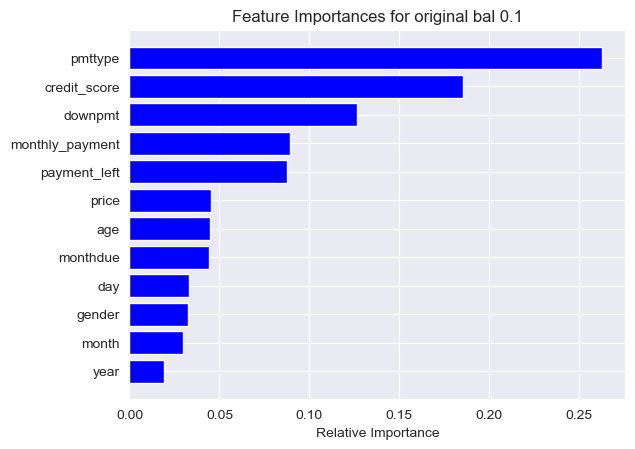


Confusion Matrix for KNN with bal original and test size of 0.1 dataset:

 [[1893  298]
 [   6  287]]

Classification Report for KNN bal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.86      0.93      2191
           1       0.49      0.98      0.65       293

    accuracy                           0.88      2484
   macro avg       0.74      0.92      0.79      2484
weighted avg       0.94      0.88      0.89      2484

0.9217556151990067
4.227063729503643

Confusion Matrix for SVM with bal original and test size of 0.1 dataset:

 [[2167   24]
 [   3  290]]

Classification Report for SVM bal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2191
           1       0.92      0.99      0.96       293

    accuracy                           0.99      2484
   macro avg       0.96      0.99      0.97      2484
weight

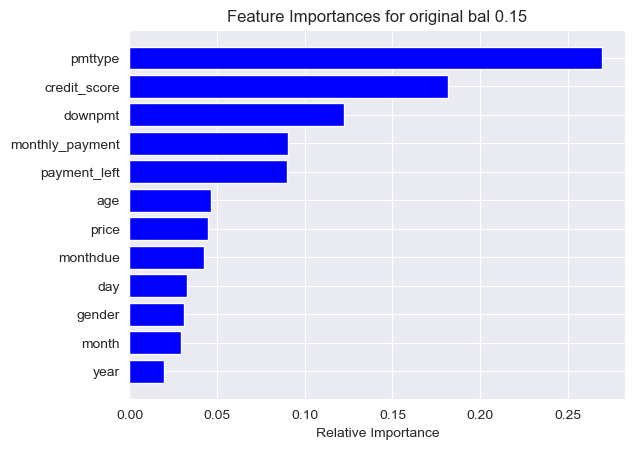


Confusion Matrix for KNN with bal original and test size of 0.15 dataset:

 [[2833  470]
 [   9  413]]

Classification Report for KNN bal original and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       1.00      0.86      0.92      3303
           1       0.47      0.98      0.63       422

    accuracy                           0.87      3725
   macro avg       0.73      0.92      0.78      3725
weighted avg       0.94      0.87      0.89      3725

0.9181890511713464
4.441463007772996

Confusion Matrix for SVM with bal original and test size of 0.15 dataset:

 [[3245   58]
 [   4  418]]

Classification Report for SVM bal original and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3303
           1       0.88      0.99      0.93       422

    accuracy                           0.98      3725
   macro avg       0.94      0.99      0.96      3725
we

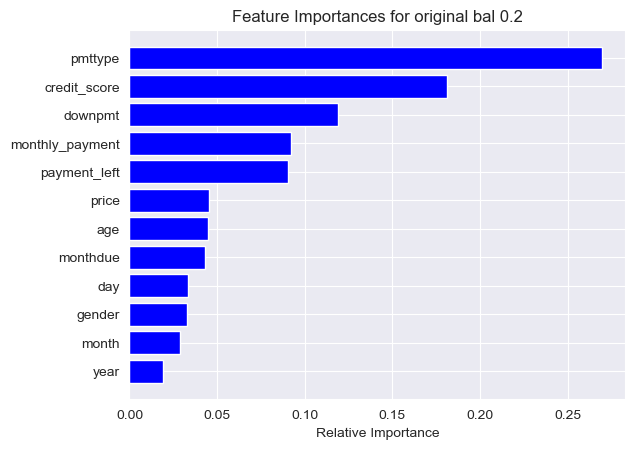


Confusion Matrix for KNN with bal original and test size of 0.2 dataset:

 [[3751  660]
 [  11  545]]

Classification Report for KNN bal original and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       1.00      0.85      0.92      4411
           1       0.45      0.98      0.62       556

    accuracy                           0.86      4967
   macro avg       0.72      0.92      0.77      4967
weighted avg       0.94      0.86      0.88      4967

0.9152949460880173
4.666004971872157

Confusion Matrix for SVM with bal original and test size of 0.2 dataset:

 [[4308  103]
 [   9  547]]

Classification Report for SVM bal original and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4411
           1       0.84      0.98      0.91       556

    accuracy                           0.98      4967
   macro avg       0.92      0.98      0.95      4967
weight

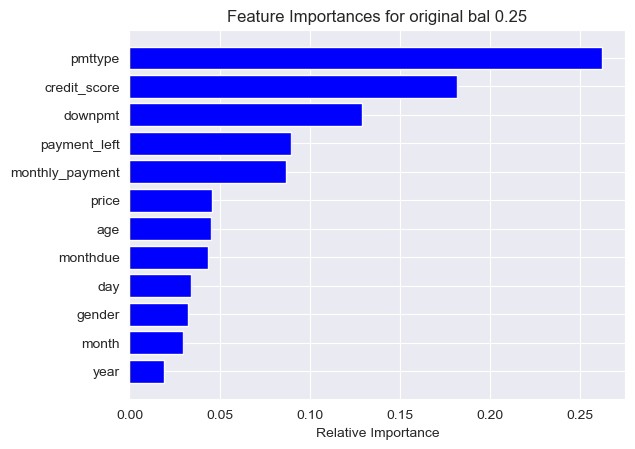


Confusion Matrix for KNN with bal original and test size of 0.25 dataset:

 [[4621  857]
 [  18  713]]

Classification Report for KNN bal original and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       1.00      0.84      0.91      5478
           1       0.45      0.98      0.62       731

    accuracy                           0.86      6209
   macro avg       0.73      0.91      0.77      6209
weighted avg       0.93      0.86      0.88      6209

0.9094661196708236
4.8674689322829

Confusion Matrix for SVM with bal original and test size of 0.25 dataset:

 [[5331  147]
 [  16  715]]

Classification Report for SVM bal original and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      5478
           1       0.83      0.98      0.90       731

    accuracy                           0.97      6209
   macro avg       0.91      0.98      0.94      6209
weig

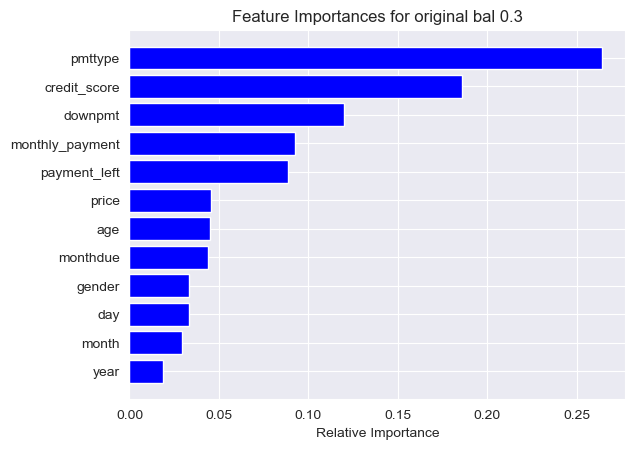


Confusion Matrix for KNN with bal original and test size of 0.3 dataset:

 [[5492 1076]
 [  26  856]]

Classification Report for KNN bal original and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       1.00      0.84      0.91      6568
           1       0.44      0.97      0.61       882

    accuracy                           0.85      7450
   macro avg       0.72      0.90      0.76      7450
weighted avg       0.93      0.85      0.87      7450

0.9033484689044112
5.109072745506909

Confusion Matrix for SVM with bal original and test size of 0.3 dataset:

 [[6377  191]
 [  30  852]]

Classification Report for SVM bal original and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      6568
           1       0.82      0.97      0.89       882

    accuracy                           0.97      7450
   macro avg       0.91      0.97      0.93      7450
weight

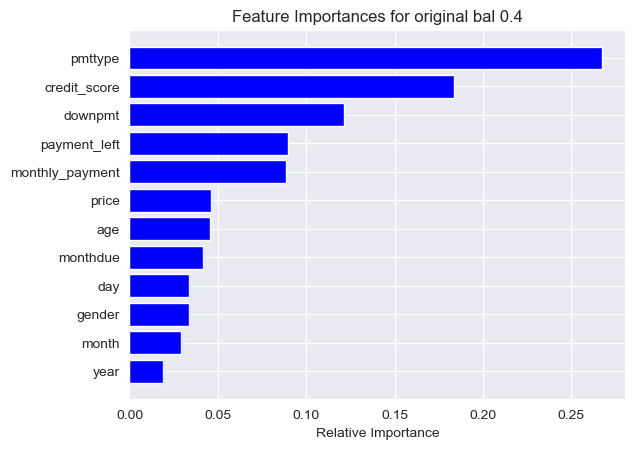


Confusion Matrix for KNN with bal original and test size of 0.4 dataset:

 [[7143 1629]
 [  45 1117]]

Classification Report for KNN bal original and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.81      0.90      8772
           1       0.41      0.96      0.57      1162

    accuracy                           0.83      9934
   macro avg       0.70      0.89      0.73      9934
weighted avg       0.93      0.83      0.86      9934

0.8877845758645291
5.820335638141159

Confusion Matrix for SVM with bal original and test size of 0.4 dataset:

 [[8440  332]
 [  49 1113]]

Classification Report for SVM bal original and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98      8772
           1       0.77      0.96      0.85      1162

    accuracy                           0.96      9934
   macro avg       0.88      0.96      0.92      9934
weight

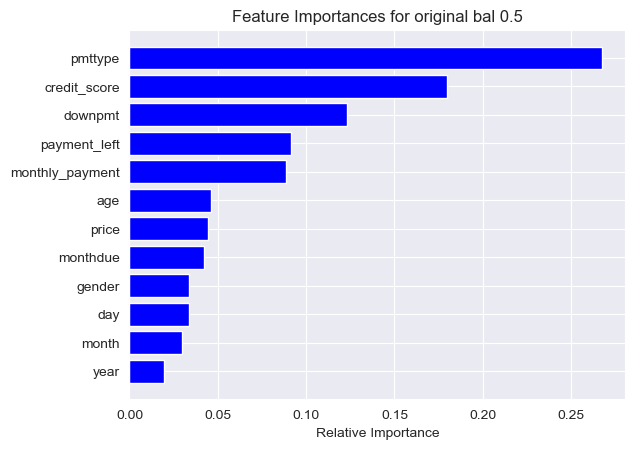


Confusion Matrix for KNN with bal original and test size of 0.5 dataset:

 [[8719 2232]
 [  87 1379]]

Classification Report for KNN bal original and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.80      0.88     10951
           1       0.38      0.94      0.54      1466

    accuracy                           0.81     12417
   macro avg       0.69      0.87      0.71     12417
weighted avg       0.92      0.81      0.84     12417

0.8684189200485407
6.450608614098581

Confusion Matrix for SVM with bal original and test size of 0.5 dataset:

 [[10463   488]
 [  107  1359]]

Classification Report for SVM bal original and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.96      0.97     10951
           1       0.74      0.93      0.82      1466

    accuracy                           0.95     12417
   macro avg       0.86      0.94      0.90     12417
we

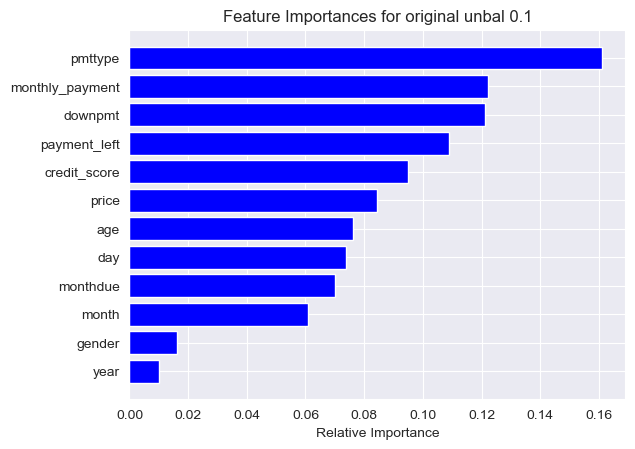


Confusion Matrix for KNN with unbal original and test size of 0.1 dataset:

 [[2061  130]
 [ 215   78]]

Classification Report for KNN unbal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.92      2191
           1       0.38      0.27      0.31       293

    accuracy                           0.86      2484
   macro avg       0.64      0.60      0.62      2484
weighted avg       0.84      0.86      0.85      2484

0.6034389832435826
4.797094123957372

Confusion Matrix for SVM with unbal original and test size of 0.1 dataset:

 [[2102   89]
 [ 231   62]]

Classification Report for SVM unbal original and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2191
           1       0.41      0.21      0.28       293

    accuracy                           0.87      2484
   macro avg       0.66      0.59      0.60      248

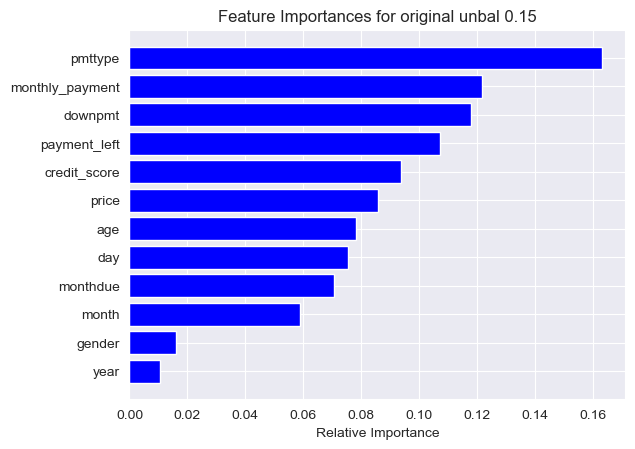


Confusion Matrix for KNN with unbal original and test size of 0.15 dataset:

 [[3113  190]
 [ 310  112]]

Classification Report for KNN unbal original and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      3303
           1       0.37      0.27      0.31       422

    accuracy                           0.87      3725
   macro avg       0.64      0.60      0.62      3725
weighted avg       0.85      0.87      0.86      3725

0.6039396900419409
4.636118153279753

Confusion Matrix for SVM with unbal original and test size of 0.15 dataset:

 [[3178  125]
 [ 330   92]]

Classification Report for SVM unbal original and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      3303
           1       0.42      0.22      0.29       422

    accuracy                           0.88      3725
   macro avg       0.66      0.59      0.61     

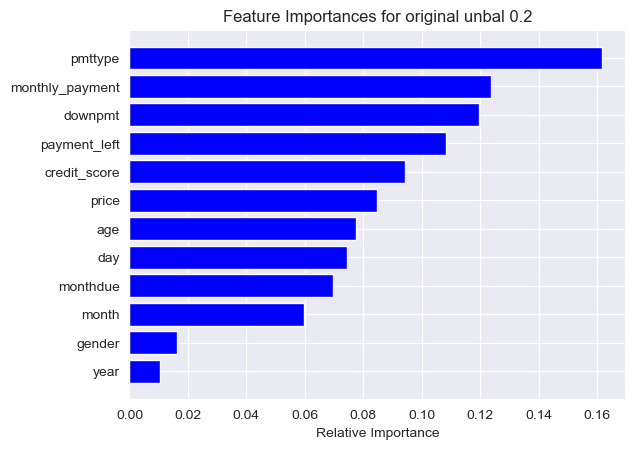


Confusion Matrix for KNN with unbal original and test size of 0.2 dataset:

 [[4158  253]
 [ 406  150]]

Classification Report for KNN unbal original and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      4411
           1       0.37      0.27      0.31       556

    accuracy                           0.87      4967
   macro avg       0.64      0.61      0.62      4967
weighted avg       0.85      0.87      0.86      4967

0.6062137820915338
4.582495659834102

Confusion Matrix for SVM with unbal original and test size of 0.2 dataset:

 [[4256  155]
 [ 445  111]]

Classification Report for SVM unbal original and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      4411
           1       0.42      0.20      0.27       556

    accuracy                           0.88      4967
   macro avg       0.66      0.58      0.60      496

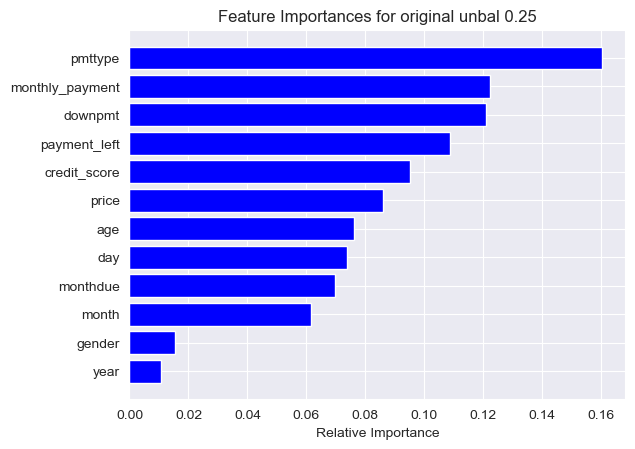


Confusion Matrix for KNN with unbal original and test size of 0.25 dataset:

 [[5174  304]
 [ 526  205]]

Classification Report for KNN unbal original and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      5478
           1       0.40      0.28      0.33       731

    accuracy                           0.87      6209
   macro avg       0.66      0.61      0.63      6209
weighted avg       0.85      0.87      0.86      6209

0.612471525200416
4.617076418971598

Confusion Matrix for SVM with unbal original and test size of 0.25 dataset:

 [[5292  186]
 [ 593  138]]

Classification Report for SVM unbal original and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      5478
           1       0.43      0.19      0.26       731

    accuracy                           0.87      6209
   macro avg       0.66      0.58      0.60      

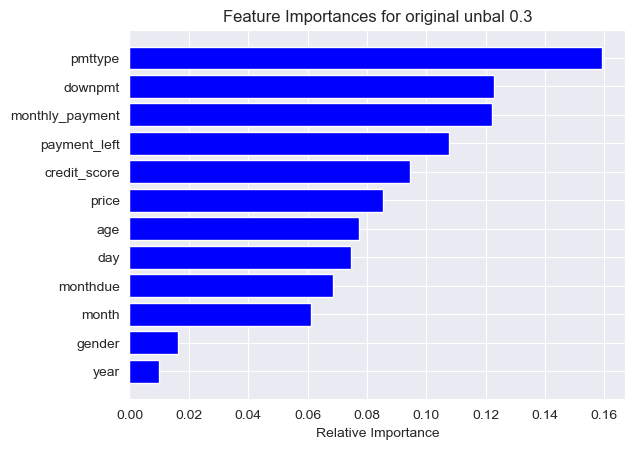


Confusion Matrix for KNN with unbal original and test size of 0.3 dataset:

 [[6221  347]
 [ 638  244]]

Classification Report for KNN unbal original and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6568
           1       0.41      0.28      0.33       882

    accuracy                           0.87      7450
   macro avg       0.66      0.61      0.63      7450
weighted avg       0.85      0.87      0.86      7450

0.6119060393138173
4.566573450912121

Confusion Matrix for SVM with unbal original and test size of 0.3 dataset:

 [[6346  222]
 [ 707  175]]

Classification Report for SVM unbal original and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6568
           1       0.44      0.20      0.27       882

    accuracy                           0.88      7450
   macro avg       0.67      0.58      0.60      745

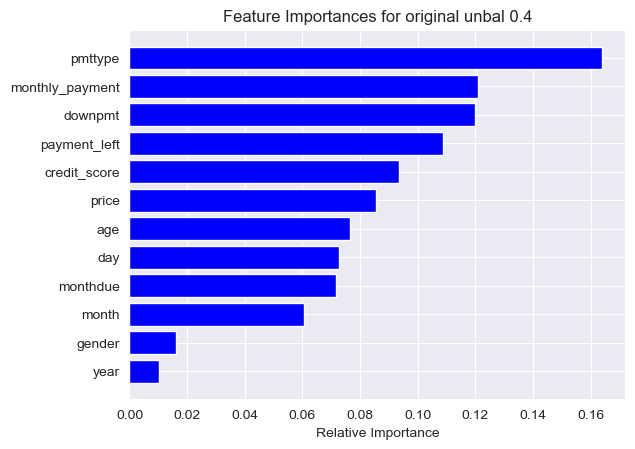


Confusion Matrix for KNN with unbal original and test size of 0.4 dataset:

 [[8328  444]
 [ 841  321]]

Classification Report for KNN unbal original and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8772
           1       0.42      0.28      0.33      1162

    accuracy                           0.87      9934
   macro avg       0.66      0.61      0.63      9934
weighted avg       0.85      0.87      0.86      9934

0.6128161267308829
4.4677554548740925

Confusion Matrix for SVM with unbal original and test size of 0.4 dataset:

 [[8499  273]
 [ 928  234]]

Classification Report for SVM unbal original and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      8772
           1       0.46      0.20      0.28      1162

    accuracy                           0.88      9934
   macro avg       0.68      0.59      0.61      99

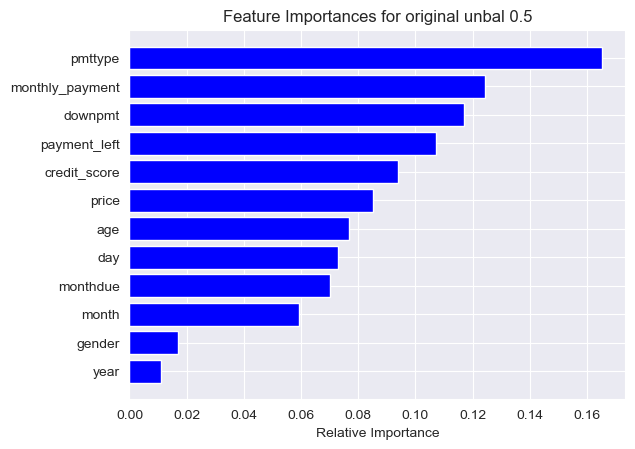


Confusion Matrix for KNN with unbal original and test size of 0.5 dataset:

 [[10414   537]
 [ 1083   383]]

Classification Report for KNN unbal original and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93     10951
           1       0.42      0.26      0.32      1466

    accuracy                           0.87     12417
   macro avg       0.66      0.61      0.62     12417
weighted avg       0.85      0.87      0.86     12417

0.6061092491506566
4.506180812078226

Confusion Matrix for SVM with unbal original and test size of 0.5 dataset:

 [[10646   305]
 [ 1185   281]]

Classification Report for SVM unbal original and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     10951
           1       0.48      0.19      0.27      1466

    accuracy                           0.88     12417
   macro avg       0.69      0.58      0.60 

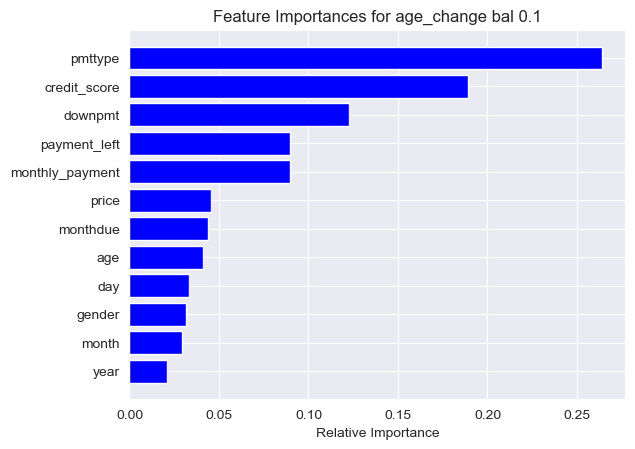


Confusion Matrix for KNN with bal age_change and test size of 0.1 dataset:

 [[1894  297]
 [   5  288]]

Classification Report for KNN bal age_change and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.86      0.93      2191
           1       0.49      0.98      0.66       293

    accuracy                           0.88      2484
   macro avg       0.74      0.92      0.79      2484
weighted avg       0.94      0.88      0.89      2484

0.9236903061391388
4.199254408896858

Confusion Matrix for SVM with bal age_change and test size of 0.1 dataset:

 [[2164   27]
 [   2  291]]

Classification Report for SVM bal age_change and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2191
           1       0.92      0.99      0.95       293

    accuracy                           0.99      2484
   macro avg       0.96      0.99      0.97      248

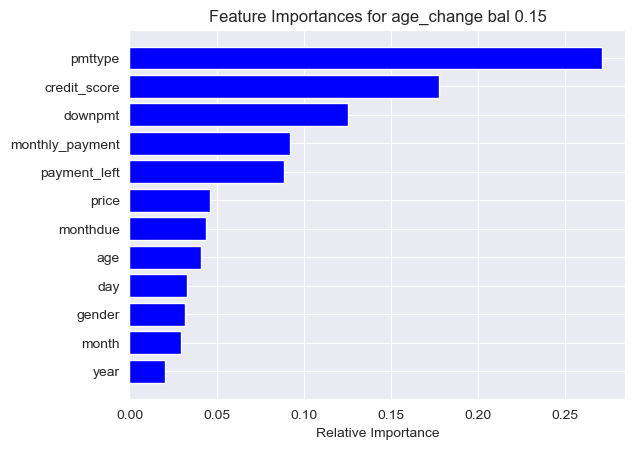


Confusion Matrix for KNN with bal age_change and test size of 0.15 dataset:

 [[2843  460]
 [   8  414]]

Classification Report for KNN bal age_change and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       1.00      0.86      0.92      3303
           1       0.47      0.98      0.64       422

    accuracy                           0.87      3725
   macro avg       0.74      0.92      0.78      3725
weighted avg       0.94      0.87      0.89      3725

0.9208876606503064
4.339467159096937

Confusion Matrix for SVM with bal age_change and test size of 0.15 dataset:

 [[3241   62]
 [   3  419]]

Classification Report for SVM bal age_change and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3303
           1       0.87      0.99      0.93       422

    accuracy                           0.98      3725
   macro avg       0.94      0.99      0.96     

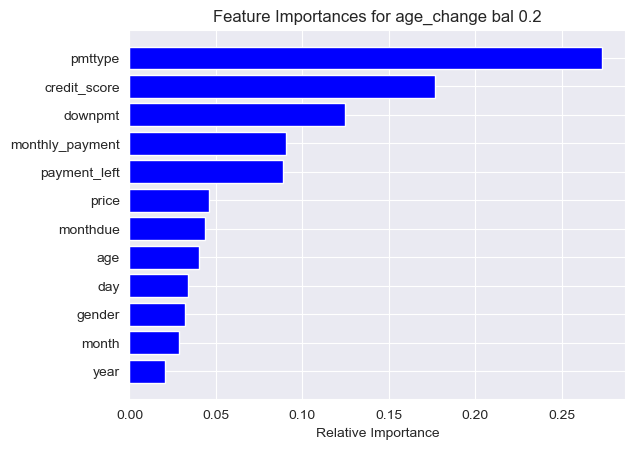


Confusion Matrix for KNN with bal age_change and test size of 0.2 dataset:

 [[3758  653]
 [  13  543]]

Classification Report for KNN bal age_change and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       1.00      0.85      0.92      4411
           1       0.45      0.98      0.62       556

    accuracy                           0.87      4967
   macro avg       0.73      0.91      0.77      4967
weighted avg       0.94      0.87      0.89      4967

0.914289855805222
4.631235598174438

Confusion Matrix for SVM with bal age_change and test size of 0.2 dataset:

 [[4307  104]
 [   9  547]]

Classification Report for SVM bal age_change and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4411
           1       0.84      0.98      0.91       556

    accuracy                           0.98      4967
   macro avg       0.92      0.98      0.95      4967

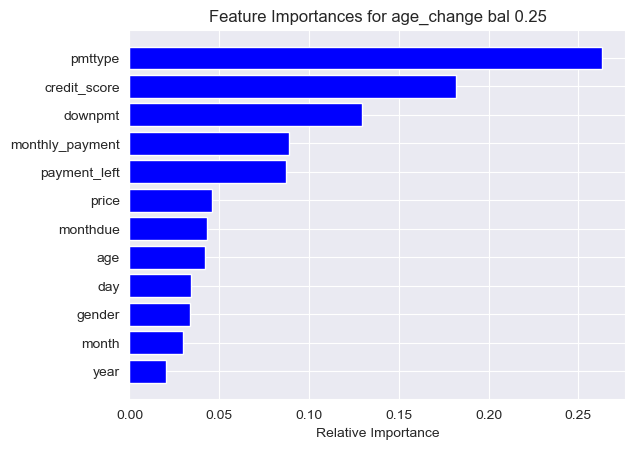


Confusion Matrix for KNN with bal age_change and test size of 0.25 dataset:

 [[4629  849]
 [  20  711]]

Classification Report for KNN bal age_change and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       1.00      0.85      0.91      5478
           1       0.46      0.97      0.62       731

    accuracy                           0.86      6209
   macro avg       0.73      0.91      0.77      6209
weighted avg       0.93      0.86      0.88      6209

0.9088283241160138
4.834091729005576

Confusion Matrix for SVM with bal age_change and test size of 0.25 dataset:

 [[5329  149]
 [  14  717]]

Classification Report for SVM bal age_change and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      5478
           1       0.83      0.98      0.90       731

    accuracy                           0.97      6209
   macro avg       0.91      0.98      0.94     

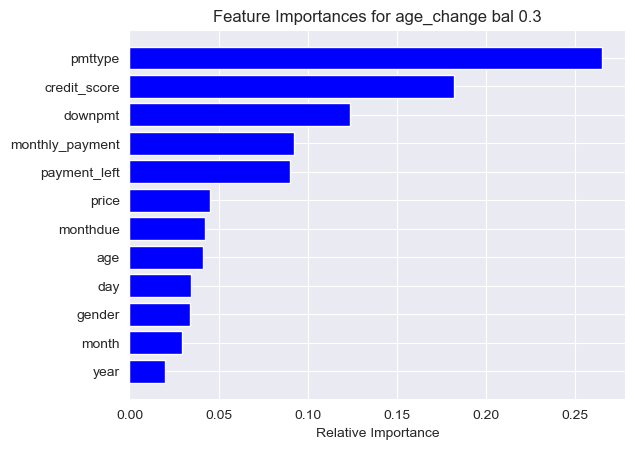


Confusion Matrix for KNN with bal age_change and test size of 0.3 dataset:

 [[5499 1069]
 [  29  853]]

Classification Report for KNN bal age_change and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.99      0.84      0.91      6568
           1       0.44      0.97      0.61       882

    accuracy                           0.85      7450
   macro avg       0.72      0.90      0.76      7450
weighted avg       0.93      0.85      0.87      7450

0.9021806753558101
5.090527684733533

Confusion Matrix for SVM with bal age_change and test size of 0.3 dataset:

 [[6369  199]
 [  26  856]]

Classification Report for SVM bal age_change and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      6568
           1       0.81      0.97      0.88       882

    accuracy                           0.97      7450
   macro avg       0.90      0.97      0.93      745

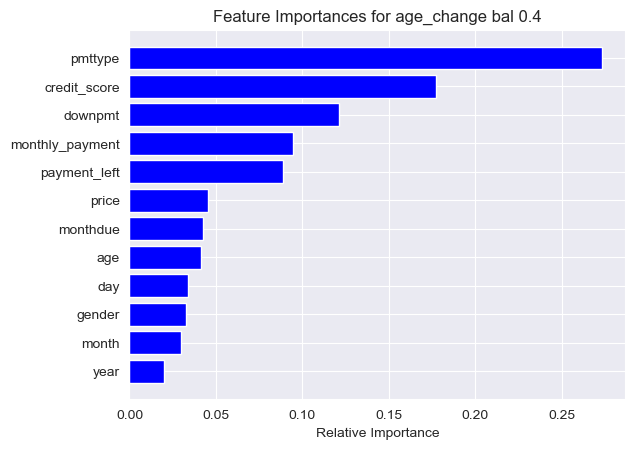


Confusion Matrix for KNN with bal age_change and test size of 0.4 dataset:

 [[7142 1630]
 [  46 1116]]

Classification Report for KNN bal age_change and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.81      0.89      8772
           1       0.41      0.96      0.57      1162

    accuracy                           0.83      9934
   macro avg       0.70      0.89      0.73      9934
weighted avg       0.92      0.83      0.86      9934

0.8872972837215581
5.827289367996932

Confusion Matrix for SVM with bal age_change and test size of 0.4 dataset:

 [[8428  344]
 [  48 1114]]

Classification Report for SVM bal age_change and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98      8772
           1       0.76      0.96      0.85      1162

    accuracy                           0.96      9934
   macro avg       0.88      0.96      0.91      993

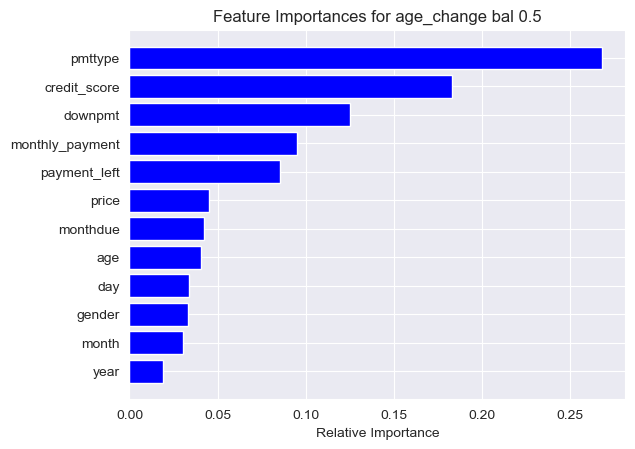


Confusion Matrix for KNN with bal age_change and test size of 0.5 dataset:

 [[8697 2254]
 [  87 1379]]

Classification Report for KNN bal age_change and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.79      0.88     10951
           1       0.38      0.94      0.54      1466

    accuracy                           0.81     12417
   macro avg       0.68      0.87      0.71     12417
weighted avg       0.92      0.81      0.84     12417

0.867414445571324
6.511804609252925

Confusion Matrix for SVM with bal age_change and test size of 0.5 dataset:

 [[10446   505]
 [  105  1361]]

Classification Report for SVM bal age_change and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.95      0.97     10951
           1       0.73      0.93      0.82      1466

    accuracy                           0.95     12417
   macro avg       0.86      0.94      0.89     1

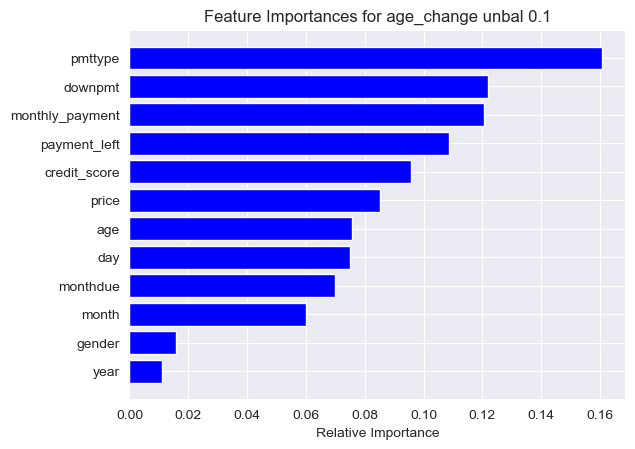


Confusion Matrix for KNN with unbal age_change and test size of 0.1 dataset:

 [[2058  133]
 [ 216   77]]

Classification Report for KNN unbal age_change and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.92      2191
           1       0.37      0.26      0.31       293

    accuracy                           0.86      2484
   macro avg       0.64      0.60      0.61      2484
weighted avg       0.84      0.86      0.85      2484

0.6010478797064629
4.852713087070066

Confusion Matrix for SVM with unbal age_change and test size of 0.1 dataset:

 [[2101   90]
 [ 229   64]]

Classification Report for SVM unbal age_change and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2191
           1       0.42      0.22      0.29       293

    accuracy                           0.87      2484
   macro avg       0.66      0.59      0.61 

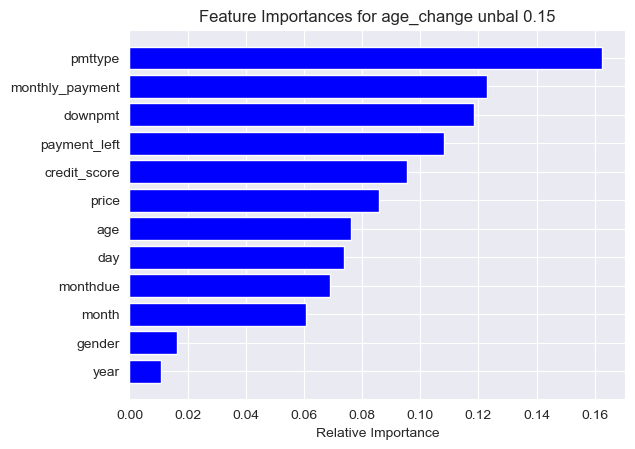


Confusion Matrix for KNN with unbal age_change and test size of 0.15 dataset:

 [[3109  194]
 [ 310  112]]

Classification Report for KNN unbal age_change and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      3303
           1       0.37      0.27      0.31       422

    accuracy                           0.86      3725
   macro avg       0.64      0.60      0.62      3725
weighted avg       0.85      0.86      0.86      3725

0.603334179899646
4.673207630855421

Confusion Matrix for SVM with unbal age_change and test size of 0.15 dataset:

 [[3176  127]
 [ 329   93]]

Classification Report for SVM unbal age_change and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      3303
           1       0.42      0.22      0.29       422

    accuracy                           0.88      3725
   macro avg       0.66      0.59      0.

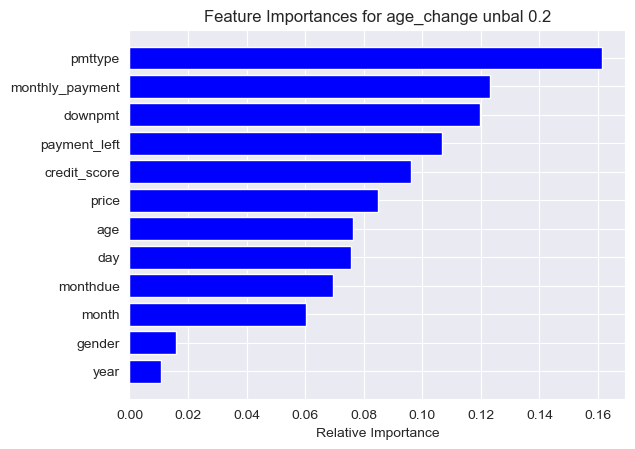


Confusion Matrix for KNN with unbal age_change and test size of 0.2 dataset:

 [[4151  260]
 [ 406  150]]

Classification Report for KNN unbal age_change and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      4411
           1       0.37      0.27      0.31       556

    accuracy                           0.87      4967
   macro avg       0.64      0.61      0.62      4967
weighted avg       0.85      0.87      0.86      4967

0.6054203112232499
4.631172332261398

Confusion Matrix for SVM with unbal age_change and test size of 0.2 dataset:

 [[4244  167]
 [ 444  112]]

Classification Report for SVM unbal age_change and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      4411
           1       0.40      0.20      0.27       556

    accuracy                           0.88      4967
   macro avg       0.65      0.58      0.60 

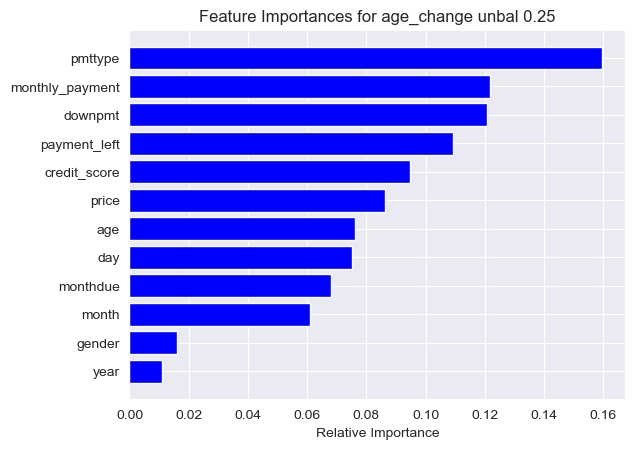


Confusion Matrix for KNN with unbal age_change and test size of 0.25 dataset:

 [[5172  306]
 [ 521  210]]

Classification Report for KNN unbal age_change and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      5478
           1       0.41      0.29      0.34       731

    accuracy                           0.87      6209
   macro avg       0.66      0.62      0.63      6209
weighted avg       0.85      0.87      0.86      6209

0.6157089494653156
4.600388590015264

Confusion Matrix for SVM with unbal age_change and test size of 0.25 dataset:

 [[5284  194]
 [ 590  141]]

Classification Report for SVM unbal age_change and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5478
           1       0.42      0.19      0.26       731

    accuracy                           0.87      6209
   macro avg       0.66      0.58      0

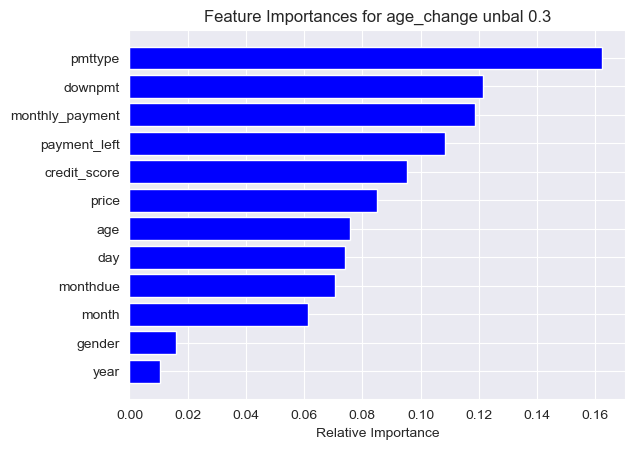


Confusion Matrix for KNN with unbal age_change and test size of 0.3 dataset:

 [[6218  350]
 [ 635  247]]

Classification Report for KNN unbal age_change and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      6568
           1       0.41      0.28      0.33       882

    accuracy                           0.87      7450
   macro avg       0.66      0.61      0.63      7450
weighted avg       0.85      0.87      0.86      7450

0.6133783395615656
4.566573772897664

Confusion Matrix for SVM with unbal age_change and test size of 0.3 dataset:

 [[6337  231]
 [ 701  181]]

Classification Report for SVM unbal age_change and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      6568
           1       0.44      0.21      0.28       882

    accuracy                           0.87      7450
   macro avg       0.67      0.59      0.61 

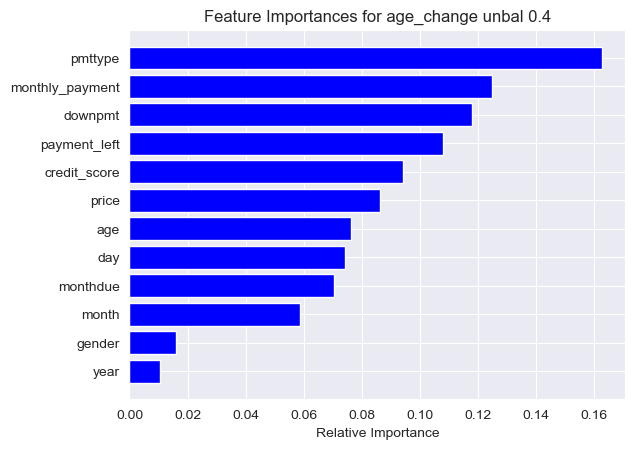


Confusion Matrix for KNN with unbal age_change and test size of 0.4 dataset:

 [[8313  459]
 [ 840  322]]

Classification Report for KNN unbal age_change and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8772
           1       0.41      0.28      0.33      1162

    accuracy                           0.87      9934
   macro avg       0.66      0.61      0.63      9934
weighted avg       0.85      0.87      0.86      9934

0.6123914261697955
4.5164322077923735

Confusion Matrix for SVM with unbal age_change and test size of 0.4 dataset:

 [[8481  291]
 [ 921  241]]

Classification Report for SVM unbal age_change and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      8772
           1       0.45      0.21      0.28      1162

    accuracy                           0.88      9934
   macro avg       0.68      0.59      0.61

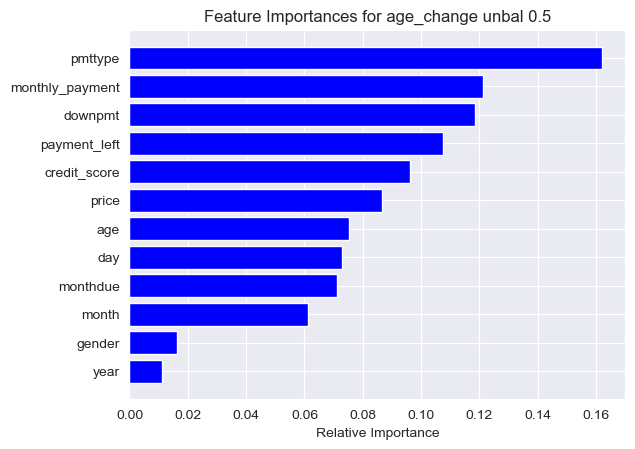


Confusion Matrix for KNN with unbal age_change and test size of 0.5 dataset:

 [[10407   544]
 [ 1082   384]]

Classification Report for KNN unbal age_change and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93     10951
           1       0.41      0.26      0.32      1466

    accuracy                           0.87     12417
   macro avg       0.66      0.61      0.62     12417
weighted avg       0.85      0.87      0.86     12417

0.606130707755233
4.52287069333388

Confusion Matrix for SVM with unbal age_change and test size of 0.5 dataset:

 [[10627   324]
 [ 1177   289]]

Classification Report for SVM unbal age_change and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     10951
           1       0.47      0.20      0.28      1466

    accuracy                           0.88     12417
   macro avg       0.69      0.58     

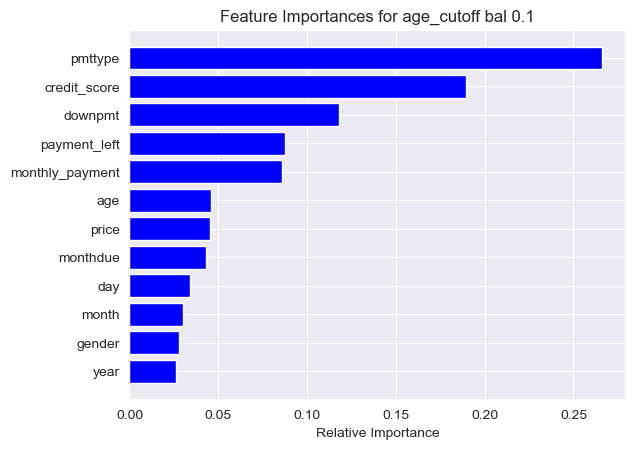


Confusion Matrix for KNN with bal age_cutoff and test size of 0.1 dataset:

 [[1749  247]
 [   7  277]]

Classification Report for KNN bal age_cutoff and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.88      0.93      1996
           1       0.53      0.98      0.69       284

    accuracy                           0.89      2280
   macro avg       0.76      0.93      0.81      2280
weighted avg       0.94      0.89      0.90      2280

0.9258023088430383
3.8478275021370933

Confusion Matrix for SVM with bal age_cutoff and test size of 0.1 dataset:

 [[1972   24]
 [   2  282]]

Classification Report for SVM bal age_cutoff and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1996
           1       0.92      0.99      0.96       284

    accuracy                           0.99      2280
   macro avg       0.96      0.99      0.97      22

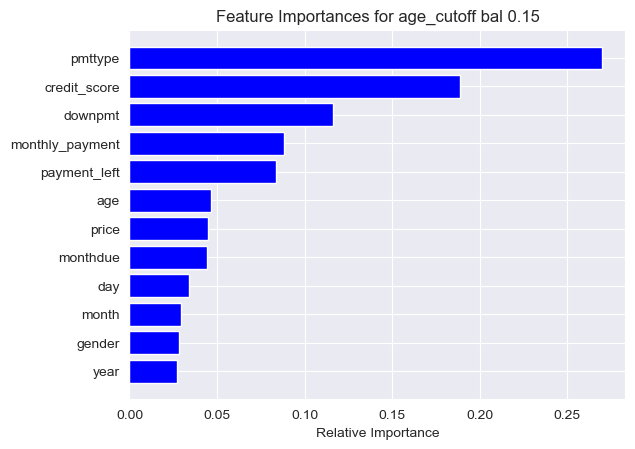


Confusion Matrix for KNN with bal age_cutoff and test size of 0.15 dataset:

 [[2578  414]
 [  14  414]]

Classification Report for KNN bal age_cutoff and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.99      0.86      0.92      2992
           1       0.50      0.97      0.66       428

    accuracy                           0.87      3420
   macro avg       0.75      0.91      0.79      3420
weighted avg       0.93      0.87      0.89      3420

0.9144603678344745
4.322493371449671

Confusion Matrix for SVM with bal age_cutoff and test size of 0.15 dataset:

 [[2936   56]
 [   4  424]]

Classification Report for SVM bal age_cutoff and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2992
           1       0.88      0.99      0.93       428

    accuracy                           0.98      3420
   macro avg       0.94      0.99      0.96     

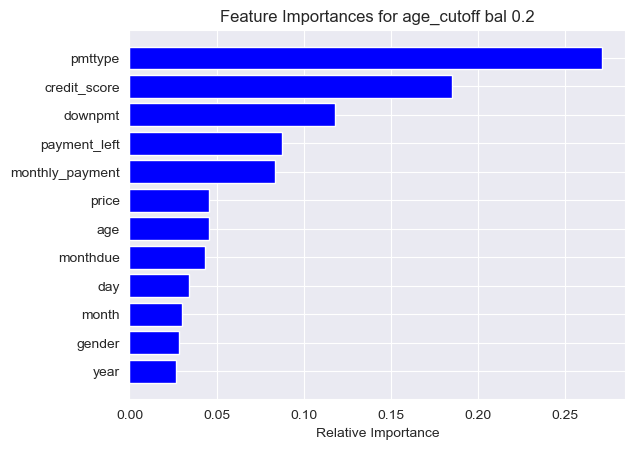


Confusion Matrix for KNN with bal age_cutoff and test size of 0.2 dataset:

 [[3410  577]
 [  19  554]]

Classification Report for KNN bal age_cutoff and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.99      0.86      0.92      3987
           1       0.49      0.97      0.65       573

    accuracy                           0.87      4560
   macro avg       0.74      0.91      0.78      4560
weighted avg       0.93      0.87      0.89      4560

0.9110604228139358
4.51437984629035

Confusion Matrix for SVM with bal age_cutoff and test size of 0.2 dataset:

 [[3908   79]
 [   8  565]]

Classification Report for SVM bal age_cutoff and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3987
           1       0.88      0.99      0.93       573

    accuracy                           0.98      4560
   macro avg       0.94      0.98      0.96      4560

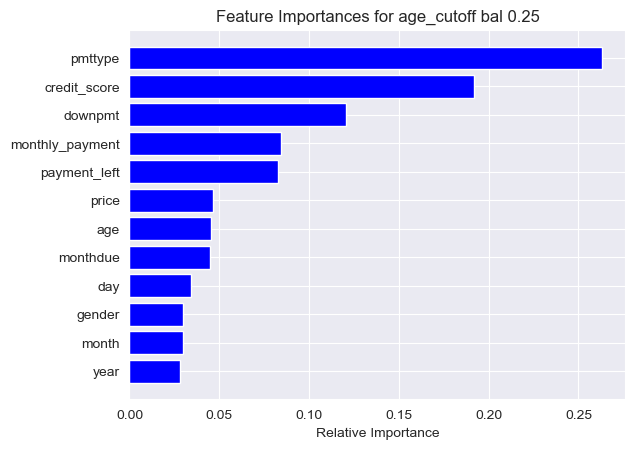


Confusion Matrix for KNN with bal age_cutoff and test size of 0.25 dataset:

 [[4212  781]
 [  26  681]]

Classification Report for KNN bal age_cutoff and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.99      0.84      0.91      4993
           1       0.47      0.96      0.63       707

    accuracy                           0.86      5700
   macro avg       0.73      0.90      0.77      5700
weighted avg       0.93      0.86      0.88      5700

0.9034029536683748
4.890073164260685

Confusion Matrix for SVM with bal age_cutoff and test size of 0.25 dataset:

 [[4871  122]
 [  15  692]]

Classification Report for SVM bal age_cutoff and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4993
           1       0.85      0.98      0.91       707

    accuracy                           0.98      5700
   macro avg       0.92      0.98      0.95     

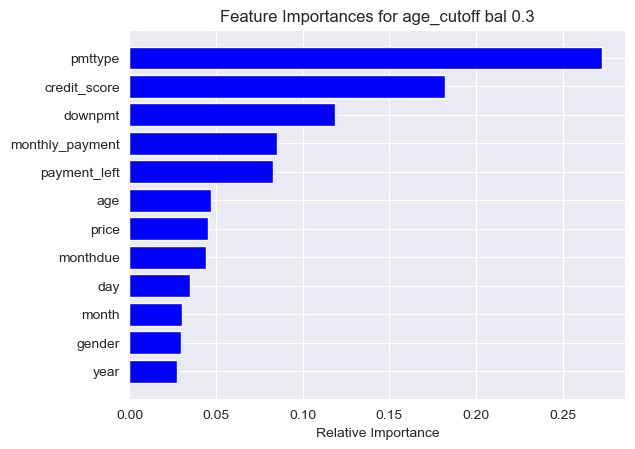


Confusion Matrix for KNN with bal age_cutoff and test size of 0.3 dataset:

 [[5018  980]
 [  33  809]]

Classification Report for KNN bal age_cutoff and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.99      0.84      0.91      5998
           1       0.45      0.96      0.61       842

    accuracy                           0.85      6840
   macro avg       0.72      0.90      0.76      6840
weighted avg       0.93      0.85      0.87      6840

0.8987099025090706
5.115287148176333

Confusion Matrix for SVM with bal age_cutoff and test size of 0.3 dataset:

 [[5825  173]
 [  32  810]]

Classification Report for SVM bal age_cutoff and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      5998
           1       0.82      0.96      0.89       842

    accuracy                           0.97      6840
   macro avg       0.91      0.97      0.94      684

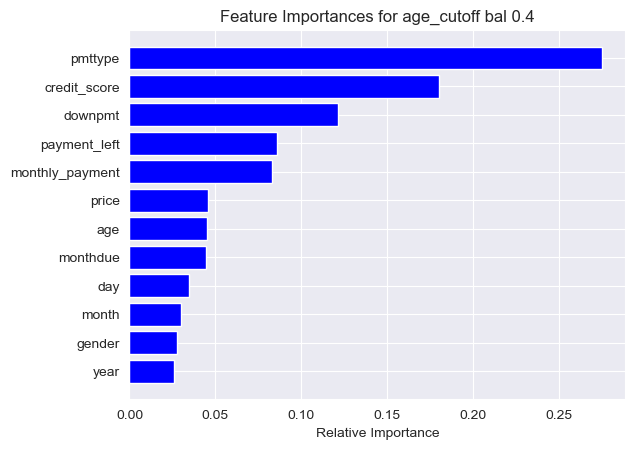


Confusion Matrix for KNN with bal age_cutoff and test size of 0.4 dataset:

 [[6485 1537]
 [  50 1048]]

Classification Report for KNN bal age_cutoff and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.81      0.89      8022
           1       0.41      0.95      0.57      1098

    accuracy                           0.83      9120
   macro avg       0.70      0.88      0.73      9120
weighted avg       0.92      0.83      0.85      9120

0.8814322770850107
6.010336307014634

Confusion Matrix for SVM with bal age_cutoff and test size of 0.4 dataset:

 [[7703  319]
 [  54 1044]]

Classification Report for SVM bal age_cutoff and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98      8022
           1       0.77      0.95      0.85      1098

    accuracy                           0.96      9120
   macro avg       0.88      0.96      0.91      912

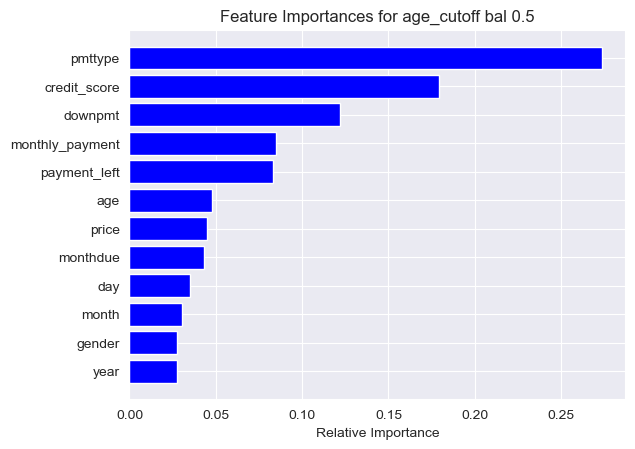


Confusion Matrix for KNN with bal age_cutoff and test size of 0.5 dataset:

 [[7941 2110]
 [  82 1266]]

Classification Report for KNN bal age_cutoff and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.79      0.88     10051
           1       0.38      0.94      0.54      1348

    accuracy                           0.81     11399
   macro avg       0.68      0.86      0.71     11399
weighted avg       0.92      0.81      0.84     11399

0.8646198896016075
6.641870778859719

Confusion Matrix for SVM with bal age_cutoff and test size of 0.5 dataset:

 [[9581  470]
 [ 111 1237]]

Classification Report for SVM bal age_cutoff and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.99      0.95      0.97     10051
           1       0.72      0.92      0.81      1348

    accuracy                           0.95     11399
   macro avg       0.86      0.94      0.89     1139

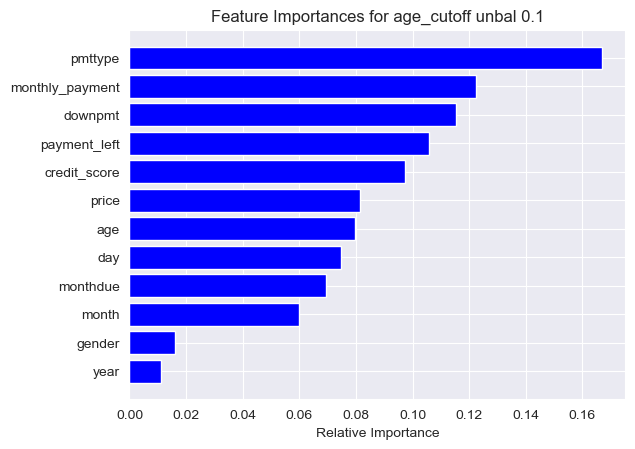


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.1 dataset:

 [[1907   89]
 [ 198   86]]

Classification Report for KNN unbal age_cutoff and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1996
           1       0.49      0.30      0.37       284

    accuracy                           0.87      2280
   macro avg       0.70      0.63      0.65      2280
weighted avg       0.85      0.87      0.86      2280

0.6291138615258687
4.3476754339959

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.1 dataset:

 [[1922   74]
 [ 212   72]]

Classification Report for SVM unbal age_cutoff and test size of 0.1 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1996
           1       0.49      0.25      0.33       284

    accuracy                           0.87      2280
   macro avg       0.70      0.61      0.63   

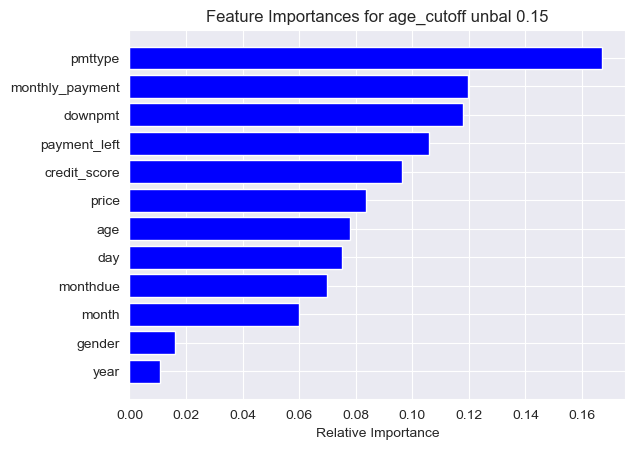


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.15 dataset:

 [[2836  156]
 [ 307  121]]

Classification Report for KNN unbal age_cutoff and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2992
           1       0.44      0.28      0.34       428

    accuracy                           0.86      3420
   macro avg       0.67      0.62      0.63      3420
weighted avg       0.84      0.86      0.85      3420

0.6152856214703384
4.675900060831215

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.15 dataset:

 [[2880  112]
 [ 323  105]]

Classification Report for SVM unbal age_cutoff and test size of 0.15 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2992
           1       0.48      0.25      0.33       428

    accuracy                           0.87      3420
   macro avg       0.69      0.60      0

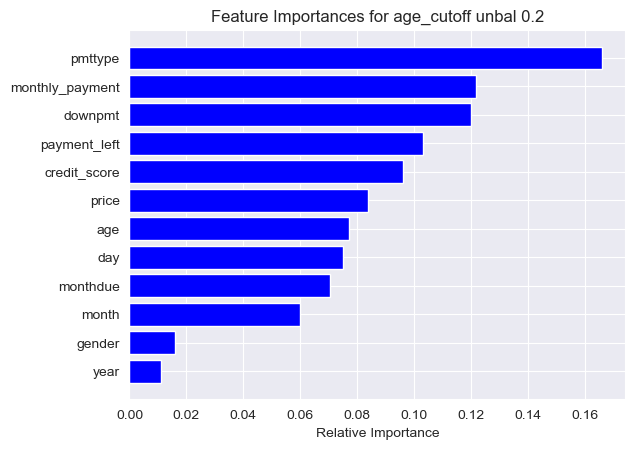


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.2 dataset:

 [[3776  211]
 [ 411  162]]

Classification Report for KNN unbal age_cutoff and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      3987
           1       0.43      0.28      0.34       573

    accuracy                           0.86      4560
   macro avg       0.67      0.61      0.63      4560
weighted avg       0.84      0.86      0.85      4560

0.6149002583002087
4.7112472878711

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.2 dataset:

 [[3843  144]
 [ 447  126]]

Classification Report for SVM unbal age_cutoff and test size of 0.2 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3987
           1       0.47      0.22      0.30       573

    accuracy                           0.87      4560
   macro avg       0.68      0.59      0.61   

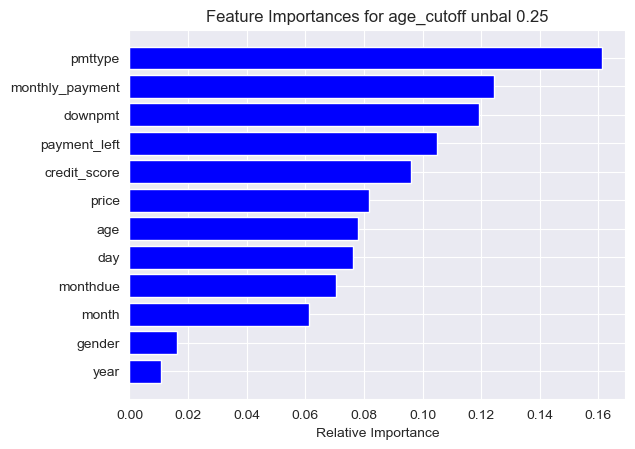


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.25 dataset:

 [[4735  258]
 [ 503  204]]

Classification Report for KNN unbal age_cutoff and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93      4993
           1       0.44      0.29      0.35       707

    accuracy                           0.87      5700
   macro avg       0.67      0.62      0.64      5700
weighted avg       0.85      0.87      0.85      5700

0.6184353993752498
4.611265812748075

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.25 dataset:

 [[4806  187]
 [ 545  162]]

Classification Report for SVM unbal age_cutoff and test size of 0.25 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      4993
           1       0.46      0.23      0.31       707

    accuracy                           0.87      5700
   macro avg       0.68      0.60      0

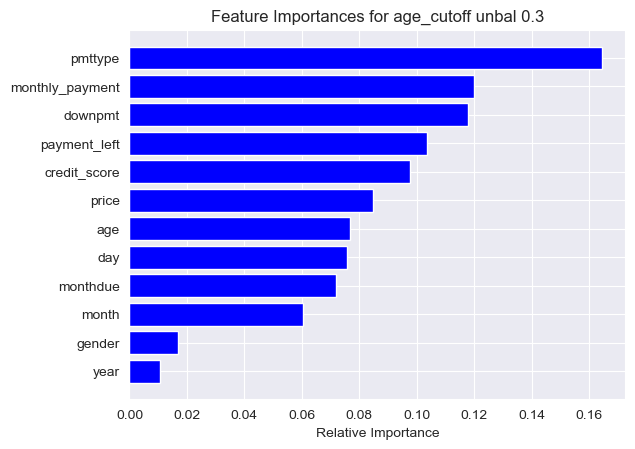


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.3 dataset:

 [[5687  311]
 [ 598  244]]

Classification Report for KNN unbal age_cutoff and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93      5998
           1       0.44      0.29      0.35       842

    accuracy                           0.87      6840
   macro avg       0.67      0.62      0.64      6840
weighted avg       0.85      0.87      0.86      6840

0.6189678032028095
4.590057955815

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.3 dataset:

 [[5772  226]
 [ 650  192]]

Classification Report for SVM unbal age_cutoff and test size of 0.3 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5998
           1       0.46      0.23      0.30       842

    accuracy                           0.87      6840
   macro avg       0.68      0.60      0.62    

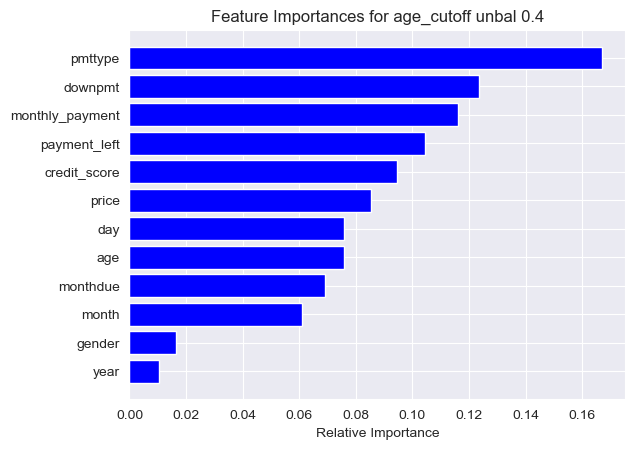


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.4 dataset:

 [[7557  465]
 [ 783  315]]

Classification Report for KNN unbal age_cutoff and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.91      0.94      0.92      8022
           1       0.40      0.29      0.34      1098

    accuracy                           0.86      9120
   macro avg       0.65      0.61      0.63      9120
weighted avg       0.85      0.86      0.85      9120

0.614459825643415
4.726399644040961

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.4 dataset:

 [[7726  296]
 [ 862  236]]

Classification Report for SVM unbal age_cutoff and test size of 0.4 dataset:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8022
           1       0.44      0.21      0.29      1098

    accuracy                           0.87      9120
   macro avg       0.67      0.59      0.61  

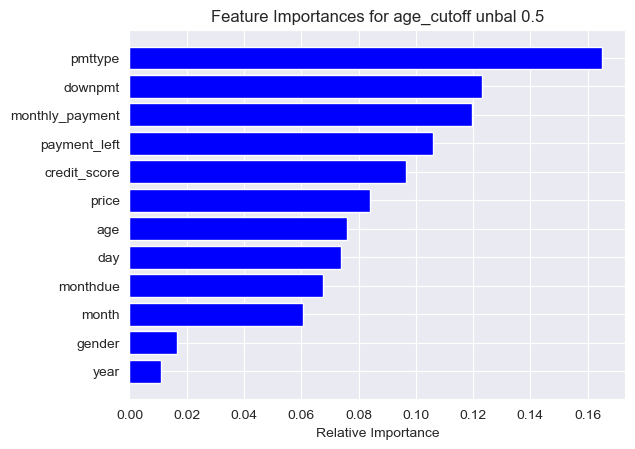


Confusion Matrix for KNN with unbal age_cutoff and test size of 0.5 dataset:

 [[9477  574]
 [ 995  353]]

Classification Report for KNN unbal age_cutoff and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92     10051
           1       0.38      0.26      0.31      1348

    accuracy                           0.86     11399
   macro avg       0.64      0.60      0.62     11399
weighted avg       0.84      0.86      0.85     11399

0.6023803454016563
4.754083615452215

Confusion Matrix for SVM with unbal age_cutoff and test size of 0.5 dataset:

 [[9709  342]
 [1093  255]]

Classification Report for SVM unbal age_cutoff and test size of 0.5 dataset:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     10051
           1       0.43      0.19      0.26      1348

    accuracy                           0.87     11399
   macro avg       0.66      0.58      0.60 

In [25]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

from sklearn import svm

from datetime import datetime
# Set up variables
unbalanced_balanced = ("bal", "unbal")

# Set test_sizes = (.4, .3, .25)
test_sizes = (.20, .15, .1)
test_sizes = (.1, .15, .20, .25, .3, .4, .5)

# Create lists to store data
confusion_matrix_list = []
class_report_list = []

# Set Base Functions for Everyone

# This will produce a feature importance graph for each Random Forest
def feature_importance_graph (rf_int, X_int, db_name, bal_or_unbal, test_size_internal):

    # We pull rf which is the RandomForestClassifier(random_state=42), X which is the X database, db name, b/u, and test size.
    # Confirmed Code 2022-11-20 0:42:00

    # Grab date for purposes of filenames to avoid overwriting
    now = datetime.now()
    dt_string = now.strftime("%Y-%m-%d_%H_%M_%S")

    # base code from Verizon Database
    features = X_int.columns
    importances = rf_int.feature_importances_
    indices = np.argsort(importances)

    # plot code
    plot_title = 'Feature Importances for ' + db_name + " " + bal_or_unbal + " " + str(test_size_internal)
    plt.title(plot_title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')

    # save plot and show
    filename = "images123/" + dt_string + "_" + db_name + "_" + bal_or_unbal + "_" + str(test_size_internal) + ".png"
    plt.savefig(filename)
    plt.show()

    # Complete and Confirmed

    return

# Set up cross validation
def cross_validation (X_train_int, y_train_int, y_test_int, cv_int, y_pred_cv_int):
    # We pull the X_train, y_train, y_test, nodel product as cv_int (which is lr, rf, knn, svm), and y_pred for each model)

    from sklearn.model_selection import cross_val_score

    cv_accuracy = cross_val_score(cv_int, X_train_int, y_train_int, scoring='accuracy', cv=10)
    cv_score = accuracy_score(y_test_int, y_pred_cv_int)
    cv_dif = (cv_accuracy.mean()-cv_score)/cv_score

    # Set up options rather than hard code (scoring and cv)

    # Returns are to add outcomes for each model run into database
    return cv_accuracy, cv_score, cv_dif


def logistic_regression_def (X_train_scaled, y_train, X_test_scaled, y_test, bal_or_unbal, db_name, test_size_internal):


    test="LR"

    # Random State helps reproduce results where random pulled
    # https://scikit-learn.org/stable/glossary.html#term-random_state
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    # Confirmed this part 2022-11-20 1:07:00 AM

    AUC_ib_lr = roc_auc_score(y_test.values, y_pred_lr)
    ll_ib_lr = log_loss(y_test.values, y_pred_lr)

    cv_accuracy_use, cv_score_use, cv_dif_use = cross_validation (X_train_scaled, y_train, y_test, lr, y_pred_lr)

    conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
    # The line above confirmed
    conf_matrix_lr_package = (conf_matrix_lr, db_name, bal_or_unbal, test_size_internal, test)
    confusion_matrix_list.append(conf_matrix_lr_package)

    class_report_lr = classification_report(y_test, y_pred_lr)
    # The line above confirmed
    class_report_lr_package = (class_report_lr, db_name, bal_or_unbal, test_size_internal, test, AUC_ib_lr, ll_ib_lr, cv_accuracy_use, cv_score_use, cv_dif_use)
    class_report_list.append(class_report_lr_package)

    print("\nConfusion Matrix for Logistic Regression Model with "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) +" dataset:\n\n", confusion_matrix(y_test, y_pred_lr))
    print("\nClassification Report for Logistic Regression Model "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) + " dataset:\n\n", classification_report(y_test, y_pred_lr))
    # confirmed on formulas

    # I think we can create a sub function to add the matrix and report rather than repeat each model
    # In the print, use the variables
    # Avoid hard code random_state
    # Looks like we can shorten first two lines to one line https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

    return

def random_forest_def (X_int, X_train, X_test, y_train, y_test, bal_or_unbal, db_name, test_size_internal):
    test = "RF"
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf= rf.predict(X_test)

    AUC_ib_rf = roc_auc_score(y_test.values, y_pred_rf)
    ll_ib_rf = log_loss(y_test.values, y_pred_rf)

    cv_accuracy_use, cv_score_use, cv_dif_use = cross_validation (X_train, y_train, y_test, rf, y_pred_rf)

    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    conf_matrix_rf_package = (conf_matrix_rf, db_name, bal_or_unbal, test_size_internal, test)
    confusion_matrix_list.append(conf_matrix_rf_package)

    class_report_rf = classification_report(y_test, y_pred_rf)
    class_report_rf_package = (class_report_rf, db_name, bal_or_unbal, test_size_internal, test, AUC_ib_rf, ll_ib_rf, cv_accuracy_use, cv_score_use, cv_dif_use)
    class_report_list.append(class_report_rf_package)

    print("\nConfusion Matrix for Random Forest Model with "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) +" dataset:\n\n", confusion_matrix(y_test, y_pred_rf))
    print("\nClassification Report for Random Forest Model "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) + " dataset:\n\n", classification_report(y_test, y_pred_rf))

    feature_importance_graph (rf, X_int, db_name, bal_or_unbal, test_size_internal)

    return

def knn_def(X_train, X_test, y_train, y_test, bal_or_unbal, db_name, test_size_internal):
    test = "KNN"

    knn = KNeighborsClassifier(3)
    knn.fit(X_train,y_train)

    knn_hat=knn.predict(X_test)

    predict_df_knn=pd.DataFrame(knn_hat,columns=['yhat'])
    predict_df_knn["y"]=y_test.values
    predict_df_knn.head()

    AUC_ib_knn=roc_auc_score(y_test.values, knn_hat)
    ll_ib_knn=log_loss(y_test.values,knn_hat)

    cv_accuracy_use, cv_score_use, cv_dif_use = cross_validation (X_train, y_train, y_test, knn, knn_hat)

    conf_matrix_knn = confusion_matrix(y_test.values,knn_hat)
    conf_matrix_knn_package = (conf_matrix_knn, db_name, bal_or_unbal, test_size_internal, test)
    confusion_matrix_list.append(conf_matrix_knn_package)

    class_report_knn = classification_report(y_test.values,knn_hat)
    class_report_knn_package = (class_report_knn, db_name, bal_or_unbal, test_size_internal, test, AUC_ib_knn, ll_ib_knn, cv_accuracy_use, cv_score_use, cv_dif_use)
    class_report_list.append(class_report_knn_package)

    print("\nConfusion Matrix for KNN with "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) +" dataset:\n\n", confusion_matrix(y_test.values,knn_hat))
    print("\nClassification Report for KNN "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) + " dataset:\n\n", classification_report(y_test.values,knn_hat))

    # print("\nConfusion Matrix for KNN Model with imbalanced dataset:\n\n", confusion_matrix(y_test.values,knn_hat))
    # print("\nClassification Report for KNN Model with imbalanced dataset:\n\n",classification_report(y_test.values,knn_hat))

    #AUC_ib_knn=roc_auc_score(y_test.values, knn_hat)
    print(AUC_ib_knn)
    #ll_ib_knn=log_loss(y_test.values,knn_hat)
    print(ll_ib_knn)

    return


def svm_def (X_train, X_test, y_train, y_test, bal_or_unbal, db_name, test_size_internal):
    test = "SVM"

    clf = svm.SVC(kernel='rbf',C=10,gamma=0.01)
    clf.fit(X_train,y_train)
    svm_hat=clf.predict(X_test)

    predict_df_svm=pd.DataFrame(svm_hat,columns=['yhat'])
    predict_df_svm["y"]=y_test.values
    predict_df_svm.head()

    cv_accuracy_use, cv_score_use, cv_dif_use = cross_validation (X_train, y_train, y_test, clf, svm_hat)

    AUC_ib_svm = roc_auc_score(y_test.values,svm_hat)
    ll_ib_svm = log_loss(y_test.values,svm_hat)

    conf_matrix_svm = confusion_matrix(y_test.values,svm_hat)
    conf_matrix_svm_package = (conf_matrix_svm, db_name, bal_or_unbal, test_size_internal, test)
    confusion_matrix_list.append(conf_matrix_svm_package)

    class_report_svm = classification_report(y_test.values,svm_hat)
    class_report_svm_package = (class_report_svm, db_name, bal_or_unbal, test_size_internal, test, AUC_ib_svm, ll_ib_svm, cv_accuracy_use, cv_score_use, cv_dif_use)
    class_report_list.append(class_report_svm_package)

    print("\nConfusion Matrix for SVM with "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) +" dataset:\n\n", confusion_matrix(y_test.values,svm_hat))
    print("\nClassification Report for SVM "+ bal_or_unbal + " " + db_name + " and test size of " + str(test_size_internal) + " dataset:\n\n", classification_report(y_test.values,svm_hat))

    #print("\nConfusion Matrix for SVM Model with imbalanced dataset:\n\n",confusion_matrix(y_test.values,svm_hat))
    #print("\nClassification Report for SVM Model with imbalanced dataset:\n\n",classification_report(y_test.values,svm_hat))

    print(AUC_ib_svm)
    print(ll_ib_svm)

    return

def create_train_set (df, df_name_int, bal_or_unbal, test_size_internal):

    X = df.drop(columns=['default'])
    y = df['default']

    # if bal_or_unbal == "bal":
    #
    #     from imblearn.over_sampling import SMOTE
    #     sm=SMOTE(random_state=42)
    #     x_res, y_res=sm.fit_resample(X,y)
    #
    #     X_internal = x_res
    #     y_internal = y_res

    if bal_or_unbal == "bal":

        from imblearn.over_sampling import SMOTE
        sm=SMOTE(random_state=42)
        x_res, y_res=sm.fit_resample(X,y)

        X_balanced = x_res
        y_balanced = y_res

        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=test_size_internal, random_state=42)

        scaler = StandardScaler()
        scaler.fit(X_train_b)
        X_train_b_scaled = scaler.transform(X_train_b)
        X_test_b_scaled = scaler.transform(X_test_b)

    # else:
    #     X_internal = X
    #     y_internal = y


    X_internal = X
    y_internal = y

    # Random state to reproduce results
    X_train, X_test, y_train, y_test = train_test_split(X_internal, y_internal, test_size=test_size_internal, random_state=42)
    #X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=test_size_internal, random_state=42)

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_internal, random_state=42)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # The feature standardization is only use in linear regression in the original Verizon
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if bal_or_unbal == "unbal":

        logistic_regression_def (X_train_scaled, y_train, X_test_scaled, y_test, bal_or_unbal, df_name_int, test_size_internal)

        random_forest_def (X, X_train, X_test, y_train, y_test, bal_or_unbal, df_name_int, test_size_internal)

        knn_def(X_train, X_test, y_train, y_test, bal_or_unbal, df_name_int, test_size_internal)

        svm_def (X_train, X_test, y_train, y_test, bal_or_unbal, df_name_int, test_size_internal)

    elif bal_or_unbal == "bal":

        logistic_regression_def (X_train_b_scaled, y_train_b, X_test_scaled, y_test, bal_or_unbal, df_name_int, test_size_internal)

        random_forest_def (X, X_train_b, X_test, y_train_b, y_test, bal_or_unbal, df_name_int, test_size_internal)

        knn_def(X_train_b, X_test, y_train_b, y_test, bal_or_unbal, df_name_int, test_size_internal)

        svm_def (X_train_b, X_test, y_train_b, y_test, bal_or_unbal, df_name_int, test_size_internal)

    return

def run_through_databases (database_int, database_name_int):

    for bal in unbalanced_balanced:

        print("Beginning ", bal)
        for test_size in test_sizes: create_train_set(database_int, database_name_int, bal, test_size)
        print ("Done with ", bal)
    return

for d, n in db_collection: run_through_databases(d, n)



## Database
##      Balanced
##          Train Set Specs
##              Models


## Things to Do
### Graphs
##3 Compare Balanced Model Code to What We Have

## ON the Cross Validation would you not use xb_train_scaled rather than xb_train?


In [26]:
confusion_matrix_list

[(array([[1369,  822],
         [  10,  283]]),
  'original',
  'bal',
  0.1,
  'LR'),
 (array([[2159,   32],
         [   4,  289]]),
  'original',
  'bal',
  0.1,
  'RF'),
 (array([[1893,  298],
         [   6,  287]]),
  'original',
  'bal',
  0.1,
  'KNN'),
 (array([[2167,   24],
         [   3,  290]]),
  'original',
  'bal',
  0.1,
  'SVM'),
 (array([[2074, 1229],
         [  16,  406]]),
  'original',
  'bal',
  0.15,
  'LR'),
 (array([[3242,   61],
         [  11,  411]]),
  'original',
  'bal',
  0.15,
  'RF'),
 (array([[2833,  470],
         [   9,  413]]),
  'original',
  'bal',
  0.15,
  'KNN'),
 (array([[3245,   58],
         [   4,  418]]),
  'original',
  'bal',
  0.15,
  'SVM'),
 (array([[2772, 1639],
         [  20,  536]]),
  'original',
  'bal',
  0.2,
  'LR'),
 (array([[4305,  106],
         [  25,  531]]),
  'original',
  'bal',
  0.2,
  'RF'),
 (array([[3751,  660],
         [  11,  545]]),
  'original',
  'bal',
  0.2,
  'KNN'),
 (array([[4308,  103],
         [ 

In [27]:
# Create Confusion Matrix Database

dbt = pd.DataFrame(confusion_matrix_list)
dbt.columns = ['Confusion Matrix','DB',"B/U", "SS", "Model"]
dbt['CM 0 row'] = dbt['Confusion Matrix'].str[0]
dbt['CM 1 row'] = dbt['Confusion Matrix'].str[-1]
dbt['CM TP 0,0'] = dbt['CM 0 row'].str[0]
dbt['CM FN 0,1'] = dbt['CM 0 row'].str[-1]
dbt['CM FP 1,0'] = dbt['CM 1 row'].str[0]
dbt['CM TN 1,1'] = dbt['CM 1 row'].str[-1]
dbt['CM Total'] = dbt['CM TP 0,0']+dbt['CM FN 0,1']+dbt['CM FP 1,0']+dbt['CM TN 1,1']

dbt['CM TP %'] = (dbt['CM TP 0,0'] / dbt['CM Total'])*100
dbt['CM TP %'] = dbt['CM TP %'].round(5)

dbt['CM FN %'] = (dbt['CM FN 0,1'] / dbt['CM Total'])*100
dbt['CM FN %'] = dbt['CM FN %'].round(5)

dbt['CM FP %'] = (dbt['CM FP 1,0'] / dbt['CM Total'])*100
dbt['CM FP %'] = dbt['CM FP %'].round(5)

dbt['CM TN %'] = (dbt['CM TN 1,1'] / dbt['CM Total'])*100
dbt['CM TN %'] = dbt['CM TN %'].round(5)

dbt['CM FP FN % +'] = (dbt['CM FN %'] + dbt['CM FP %']).round(5)
dbt['CM FP FN % +'] = dbt['CM FP FN % +'].round(5)
dbt['CM FP FN %+ rnd'] = dbt['CM FP FN % +'].round(1)

#dbt[]
dbt = dbt[['DB','B/U', 'SS', 'Model','Confusion Matrix','CM TP 0,0','CM FN 0,1','CM FP 1,0','CM TN 1,1', 'CM 0 row', 'CM 1 row','CM Total','CM TP %',
           'CM FN %','CM FP %','CM TN %', 'CM FP FN % +','CM FP FN %+ rnd']]
dbt['FP+FN'] = dbt['CM FN 0,1'] + dbt['CM FP 1,0']
dbt

DB    B/U    SS Model            Confusion Matrix  CM TP 0,0  \
0      original    bal  0.10    LR    [[1369, 822], [10, 283]]       1369   
1      original    bal  0.10    RF      [[2159, 32], [4, 289]]       2159   
2      original    bal  0.10   KNN     [[1893, 298], [6, 287]]       1893   
3      original    bal  0.10   SVM      [[2167, 24], [3, 290]]       2167   
4      original    bal  0.15    LR   [[2074, 1229], [16, 406]]       2074   
..          ...    ...   ...   ...                         ...        ...   
163  age_cutoff  unbal  0.40   SVM   [[7726, 296], [862, 236]]       7726   
164  age_cutoff  unbal  0.50    LR   [[9714, 337], [714, 634]]       9714   
165  age_cutoff  unbal  0.50    RF   [[9734, 317], [699, 649]]       9734   
166  age_cutoff  unbal  0.50   KNN   [[9477, 574], [995, 353]]       9477   
167  age_cutoff  unbal  0.50   SVM  [[9709, 342], [1093, 255]]       9709   

     CM FN 0,1  CM FP 1,0  CM TN 1,1      CM 0 row     CM 1 row  CM Total  \
0          822         10        283   [1369, 822]    [10, 283]      2484   
1           32          4        289    [2159, 32]     [4, 289]      2484   
2          298          6        287   [1893, 298]     [6, 287]      2484   
3           24          3        290    [2167, 24]     [3, 290]      2484   
4         1229         16        406  [2074, 1229]    [16, 406]      3725   
..         ...        ...        ...           ...          ...       ...   
163        296        862        236   [7726, 296]   [862, 236]      9120   
164        337        714        634   [9714, 337]   [714, 634]     11399   
165        317        699        649   [9734, 317]   [699, 649]     11399   
166        574        995        353   [9477, 574]   [995, 353]     11399   
167        342       1093        255   [9709, 342]  [1093, 255]     11399   

      CM TP %   CM FN %  CM FP %   CM TN %  CM FP FN % +  CM FP FN %+ rnd  \
0    55.11272  33.09179  0.40258  11.39291      33.49437             33.5   
1    86.91626   1.28824  0.16103  11.63446       1.44927              1.4   
2    76.20773  11.99678  0.24155  11.55395      12.23833             12.2   
3    87.23833   0.96618  0.12077  11.67472       1.08695              1.1   
4    55.67785  32.99329  0.42953  10.89933      33.42282             33.4   
..        ...       ...      ...       ...           ...              ...   
163  84.71491   3.24561  9.45175   2.58772      12.69736             12.7   
164  85.21800   2.95640  6.26371   5.56189       9.22011              9.2   
165  85.39346   2.78095  6.13212   5.69348       8.91307              8.9   
166  83.13887   5.03553  8.72884   3.09676      13.76437             13.8   
167  85.17414   3.00026  9.58856   2.23704      12.58882             12.6   

     FP+FN  
0      832  
1       36  
2      304  
3       27  
4     1245  
..     ...  
163   1158  
164   1051  
165   1016  
166   1569  
167   1435  

[168 rows x 19 columns]

In [28]:
dbt2 = dbt.sort_values(['CM FP FN %+ rnd','CM FP %'])
dbt2

DB  B/U    SS Model            Confusion Matrix  CM TP 0,0  \
115  age_cutoff  bal  0.10   SVM      [[1972, 24], [2, 282]]       1972   
3      original  bal  0.10   SVM      [[2167, 24], [3, 290]]       2167   
59   age_change  bal  0.10   SVM      [[2164, 27], [2, 291]]       2164   
57   age_change  bal  0.10    RF      [[2165, 26], [5, 288]]       2165   
1      original  bal  0.10    RF      [[2159, 32], [4, 289]]       2159   
..          ...  ...   ...   ...                         ...        ...   
8      original  bal  0.20    LR   [[2772, 1639], [20, 536]]       2772   
4      original  bal  0.15    LR   [[2074, 1229], [16, 406]]       2074   
0      original  bal  0.10    LR    [[1369, 822], [10, 283]]       1369   
24     original  bal  0.50    LR  [[6835, 4116], [52, 1414]]       6835   
80   age_change  bal  0.50    LR  [[6818, 4133], [48, 1418]]       6818   

     CM FN 0,1  CM FP 1,0  CM TN 1,1      CM 0 row    CM 1 row  CM Total  \
115         24          2        282    [1972, 24]    [2, 282]      2280   
3           24          3        290    [2167, 24]    [3, 290]      2484   
59          27          2        291    [2164, 27]    [2, 291]      2484   
57          26          5        288    [2165, 26]    [5, 288]      2484   
1           32          4        289    [2159, 32]    [4, 289]      2484   
..         ...        ...        ...           ...         ...       ...   
8         1639         20        536  [2772, 1639]   [20, 536]      4967   
4         1229         16        406  [2074, 1229]   [16, 406]      3725   
0          822         10        283   [1369, 822]   [10, 283]      2484   
24        4116         52       1414  [6835, 4116]  [52, 1414]     12417   
80        4133         48       1418  [6818, 4133]  [48, 1418]     12417   

      CM TP %   CM FN %  CM FP %   CM TN %  CM FP FN % +  CM FP FN %+ rnd  \
115  86.49123   1.05263  0.08772  12.36842       1.14035              1.1   
3    87.23833   0.96618  0.12077  11.67472       1.08695              1.1   
59   87.11755   1.08696  0.08052  11.71498       1.16748              1.2   
57   87.15781   1.04670  0.20129  11.59420       1.24799              1.2   
1    86.91626   1.28824  0.16103  11.63446       1.44927              1.4   
..        ...       ...      ...       ...           ...              ...   
8    55.80834  32.99779  0.40266  10.79122      33.40045             33.4   
4    55.67785  32.99329  0.42953  10.89933      33.42282             33.4   
0    55.11272  33.09179  0.40258  11.39291      33.49437             33.5   
24   55.04550  33.14810  0.41878  11.38761      33.56688             33.6   
80   54.90859  33.28501  0.38657  11.41983      33.67158             33.7   

     FP+FN  
115     26  
3       27  
59      29  
57      31  
1       36  
..     ...  
8     1659  
4     1245  
0      832  
24    4168  
80    4181  

[168 rows x 19 columns]

In [29]:


import plotly.graph_objects as go
n_cols = len(dbt2.columns)
n_rows = len(dbt2)
#df.drop(["index"], axis=1)

header_c = 'maroon'
rows_c = ['white']*(n_rows)

rows_c.extend(['white'])

rows_f = ['darkslategray']*(n_rows)
rows_f.extend(['white'])

fig = go.Figure(data=[go.Table(columnwidth = [80]*(n_cols+1),
                               header=dict(values=list(dbt2.columns),
                                           line_color='darkslategray',
                                           fill_color=header_c,
                                           font=dict(color='white',
                                                     size=12)),
                               cells=dict(values=list(dbt2.values.transpose()),
                                          line_color='darkslategray',
                                          fill_color = [rows_c*n_cols],
                                          font = dict(color = [rows_f*n_cols],
                                                      size = 12)))],)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})
fig.update_layout(title={
        'text': "Model Test Results",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
    font=dict(
        family="Times, monospace",
        size=18,
        color="Maroon",
    ))
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H_%M_%S")
filename_cf = "images123/" + dt_string + "confusion_sorted_25to40"
dbt2.to_csv(filename_cf+".csv")
#filename_cf_png = filename_cf + ".png"
filename_cf_html = filename_cf + ".html"
fig.show()
plt.savefig(filename_cf + ".png")
fig.write_html(filename_cf + ".html")

<Figure size 640x480 with 0 Axes>

In [30]:
class_rep_df = pd.DataFrame(class_report_list)

class_rep_df[0] = class_rep_df[0].str.split().agg(" ".join)
class_rep_df[0] = class_rep_df[0].str.replace("\n", "")
class_rep_df[0] = class_rep_df[0].str.split(" ", n = -1, expand = False)

class_rep_df['0 precision'] = class_rep_df[0].str[5].astype('float')
class_rep_df['0 recall'] = class_rep_df[0].str[6].astype('float')
class_rep_df['0 f1'] = class_rep_df[0].str[7].astype('float')
class_rep_df['0 support'] = class_rep_df[0].str[8].astype('float')

class_rep_df['1 precision'] = class_rep_df[0].str[10].astype('float')
class_rep_df['1 recall'] = class_rep_df[0].str[11].astype('float')
class_rep_df['1 f1-score'] = class_rep_df[0].str[12].astype('float')
class_rep_df['1 support'] = class_rep_df[0].str[13].astype('float')

class_rep_df['accuracy f1'] = class_rep_df[0].str[15].astype('float')
class_rep_df['accuracy support'] = class_rep_df[0].str[16].astype('float')

class_rep_df['macro avg precision'] = class_rep_df[0].str[19].astype('float')
class_rep_df['macro avg recall'] = class_rep_df[0].str[20].astype('float')
class_rep_df['macro avg f1'] = class_rep_df[0].str[21].astype('float')
class_rep_df['macro avg support'] = class_rep_df[0].str[22].astype('float')

class_rep_df['wt avg precision'] = class_rep_df[0].str[25].astype('float')
class_rep_df['wt avg recall'] = class_rep_df[0].str[26].astype('float')
class_rep_df['wt avg f1-score'] = class_rep_df[0].str[27].astype('float')
class_rep_df['wt avg support'] = class_rep_df[0].str[28].astype('float')

In [31]:
class_rep_df.columns = ['Classification Report', 'DB', 'B/U', 'SS', 'Model', 'AUC', 'Log Loss', 'CV Acc', 'CV Score', 'CV Diff',
                        '0 precision', '0 recall', '0 f1', '0 support', '1 precision', '1 recall', '1 f1-score', '1 support', 'accuracy f1',
                        'accuracy support', 'macro avg precision', 'macro avg recall', 'macro avg f1', 'macro avg support', 'wt avg precision',
                        'wt avg recall', 'wt avg f1-score', 'wt avg support']

In [32]:
class_rep_df = class_rep_df[['DB', 'B/U', 'SS', 'Model', 'AUC', 'Log Loss', 'CV Score', 'CV Diff', '0 precision', '0 recall', '0 f1',
                             '0 support', '1 precision', '1 recall', '1 f1-score', '1 support', 'accuracy f1', 'accuracy support',
                             'macro avg precision', 'macro avg recall', 'macro avg f1', 'macro avg support', 'wt avg precision',
                             'wt avg recall', 'wt avg f1-score', 'wt avg support', 'Classification Report', 'CV Acc']]

In [33]:
class_rep_df['CV Score'] = class_rep_df['CV Score'].astype('float')
class_rep_df['CV Diff'] = class_rep_df['CV Diff'].astype('float')
class_rep_df['AUC'] = class_rep_df['AUC'].astype('float')
class_rep_df['Log Loss'] = class_rep_df['Log Loss'].astype('float')
class_rep_df['CV Score'] = class_rep_df['CV Score'].round(7)
class_rep_df['CV Diff'] = class_rep_df['CV Diff'].round(7)
class_rep_df.round(6)

DB    B/U    SS Model       AUC   Log Loss  CV Score   CV Diff  \
0      original    bal  0.10    LR  0.795350  11.568808  0.665056  0.341546   
1      original    bal  0.10    RF  0.985871   0.500572  0.985507 -0.042961   
2      original    bal  0.10   KNN  0.921756   4.227064  0.877617  0.005387   
3      original    bal  0.10   SVM  0.989404   0.375429  0.989130 -0.059961   
4      original    bal  0.15    LR  0.795000  11.544096  0.665772  0.339508   
..          ...    ...   ...   ...       ...        ...       ...       ...   
163  age_cutoff  unbal  0.40   SVM  0.589019   4.385542  0.873026  0.000314   
164  age_cutoff  unbal  0.50    LR  0.718399   3.184536  0.907799 -0.005024   
165  age_cutoff  unbal  0.50    RF  0.724957   3.078485  0.910869 -0.002311   
166  age_cutoff  unbal  0.50   KNN  0.602380   4.754084  0.862356 -0.005800   
167  age_cutoff  unbal  0.50   SVM  0.577571   4.348050  0.874112 -0.004917   

     0 precision  0 recall  ...  macro avg precision  macro avg recall  \
0           0.99      0.62  ...                 0.62              0.80   
1           1.00      0.99  ...                 0.95              0.99   
2           1.00      0.86  ...                 0.74              0.92   
3           1.00      0.99  ...                 0.96              0.99   
4           0.99      0.63  ...                 0.62              0.79   
..           ...       ...  ...                  ...               ...   
163         0.90      0.96  ...                 0.67              0.59   
164         0.93      0.97  ...                 0.79              0.72   
165         0.93      0.97  ...                 0.80              0.72   
166         0.90      0.94  ...                 0.64              0.60   
167         0.90      0.97  ...                 0.66              0.58   

     macro avg f1  macro avg support  wt avg precision  wt avg recall  \
0            0.59             2484.0              0.91           0.67   
1            0.97             2484.0              0.99           0.99   
2            0.79             2484.0              0.94           0.88   
3            0.97             2484.0              0.99           0.99   
4            0.58             3725.0              0.91           0.67   
..            ...                ...               ...            ...   
163          0.61             9120.0              0.84           0.87   
164          0.75            11399.0              0.90           0.91   
165          0.76            11399.0              0.90           0.91   
166          0.62            11399.0              0.84           0.86   
167          0.60            11399.0              0.84           0.87   

     wt avg f1-score  wt avg support  \
0               0.72          2484.0   
1               0.99          2484.0   
2               0.89          2484.0   
3               0.99          2484.0   
4               0.73          3725.0   
..               ...             ...   
163             0.85          9120.0   
164             0.90         11399.0   
165             0.90         11399.0   
166             0.85         11399.0   
167             0.85         11399.0   

                                 Classification Report  \
0    [precision, recall, f1-score, support, 0, 0.99...   
1    [precision, recall, f1-score, support, 0, 1.00...   
2    [precision, recall, f1-score, support, 0, 1.00...   
3    [precision, recall, f1-score, support, 0, 1.00...   
4    [precision, recall, f1-score, support, 0, 0.99...   
..                                                 ...   
163  [precision, recall, f1-score, support, 0, 0.90...   
164  [precision, recall, f1-score, support, 0, 0.93...   
165  [precision, recall, f1-score, support, 0, 0.93...   
166  [precision, recall, f1-score, support, 0, 0.90...   
167  [precision, recall, f1-score, support, 0, 0.90...   

                                                CV Acc  
0    [0.8961071789686552, 0.890798786653185, 0.8865...  
1    [

In [34]:
class_rep_df['AUC'] = class_rep_df['AUC'].astype('str')
class_rep_df['AUC'] = class_rep_df['AUC'].str.replace("0.0", "")
class_rep_df['AUC'] = class_rep_df['AUC'].str[:8]

class_rep_df['Log Loss'] = class_rep_df['Log Loss'].astype('str')
class_rep_df['Log Loss'] = class_rep_df['Log Loss'].str.replace("0.0", "")
class_rep_df['Log Loss'] = class_rep_df['Log Loss'].str[:8]


In [35]:
class_rep_df

DB    B/U    SS Model       AUC  Log Loss  CV Score   CV Diff  \
0      original    bal  0.10    LR  0.795349  11.56886  0.665056  0.341546   
1      original    bal  0.10    RF  0.985871  0.500572  0.985507 -0.042961   
2      original    bal  0.10   KNN  0.921755  4.227063  0.877617  0.005387   
3      original    bal  0.10   SVM  0.989403  0.375429  0.989130 -0.059961   
4      original    bal  0.15    LR  0.794999  11.54409  0.665772  0.339508   
..          ...    ...   ...   ...       ...       ...       ...       ...   
163  age_cutoff  unbal  0.40   SVM  0.589018  4.385541  0.873026  0.000314   
164  age_cutoff  unbal  0.50    LR  0.718398  3.184535  0.907799 -0.005024   
165  age_cutoff  unbal  0.50    RF  0.724957  3.078484  0.910869 -0.002311   
166  age_cutoff  unbal  0.50   KNN  0.602380  4.754083  0.862356 -0.005800   
167  age_cutoff  unbal  0.50   SVM  0.577571  4.348049  0.874112 -0.004917   

     0 precision  0 recall  ...  macro avg precision  macro avg recall  \
0           0.99      0.62  ...                 0.62              0.80   
1           1.00      0.99  ...                 0.95              0.99   
2           1.00      0.86  ...                 0.74              0.92   
3           1.00      0.99  ...                 0.96              0.99   
4           0.99      0.63  ...                 0.62              0.79   
..           ...       ...  ...                  ...               ...   
163         0.90      0.96  ...                 0.67              0.59   
164         0.93      0.97  ...                 0.79              0.72   
165         0.93      0.97  ...                 0.80              0.72   
166         0.90      0.94  ...                 0.64              0.60   
167         0.90      0.97  ...                 0.66              0.58   

     macro avg f1  macro avg support  wt avg precision  wt avg recall  \
0            0.59             2484.0              0.91           0.67   
1            0.97             2484.0              0.99           0.99   
2            0.79             2484.0              0.94           0.88   
3            0.97             2484.0              0.99           0.99   
4            0.58             3725.0              0.91           0.67   
..            ...                ...               ...            ...   
163          0.61             9120.0              0.84           0.87   
164          0.75            11399.0              0.90           0.91   
165          0.76            11399.0              0.90           0.91   
166          0.62            11399.0              0.84           0.86   
167          0.60            11399.0              0.84           0.87   

     wt avg f1-score  wt avg support  \
0               0.72          2484.0   
1               0.99          2484.0   
2               0.89          2484.0   
3               0.99          2484.0   
4               0.73          3725.0   
..               ...             ...   
163             0.85          9120.0   
164             0.90         11399.0   
165             0.90         11399.0   
166             0.85         11399.0   
167             0.85         11399.0   

                                 Classification Report  \
0    [precision, recall, f1-score, support, 0, 0.99...   
1    [precision, recall, f1-score, support, 0, 1.00...   
2    [precision, recall, f1-score, support, 0, 1.00...   
3    [precision, recall, f1-score, support, 0, 1.00...   
4    [precision, recall, f1-score, support, 0, 0.99...   
..                                                 ...   
163  [precision, recall, f1-score, support, 0, 0.90...   
164  [precision, recall, f1-score, support, 0, 0.93...   
165  [precision, recall, f1-score, support, 0, 0.93...   
166  [precision, recall, f1-score, support, 0, 0.90...   
167  [precision, recall, f1-score, support, 0, 0.90...   

                                                CV Acc  
0    [0.8961071789686552, 0.890798786653185, 0.8865...  
1    [0.9438827098

In [303]:

import plotly.graph_objects as go
n_cols = len(class_rep_df.columns)
n_rows = len(class_rep_df)
#df.drop(["index"], axis=1)

header_c = 'maroon'
rows_c = ['white']*(n_rows)

rows_c.extend(['white'])

rows_f = ['darkslategray']*(n_rows)
rows_f.extend(['white'])

fig = go.Figure(data=[go.Table(columnwidth = [80]*(n_cols+1),
                               header=dict(values=list(class_rep_df.columns),
                                           line_color='darkslategray',
                                           fill_color=header_c,
                                           font=dict(color='white',
                                                     size=12)),
                               cells=dict(values=list(class_rep_df.values.transpose()),
                                          line_color='darkslategray',
                                          fill_color = [rows_c*n_cols],
                                          font = dict(color = [rows_f*n_cols],
                                                      size = 12)))],)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})
fig.update_layout(title={
        'text': "Model Test Results",
        'y':0.91,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
    font=dict(
        family="Times, monospace",
        size=18,
        color="Maroon",
    ))
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})

fig.show()
fig.write_html('images123/class_report.html')



filename_cr = "images123/" + dt_string + "class_report_25to40"
class_rep_df.to_csv(filename_cr+".csv")
#filename_cf_png = filename_cf + ".png"
filename_cr_html = filename_cr + ".html"
plt.savefig(filename_cr + ".png")
fig.show()
fig.write_html(filename_cr + ".html")


<Figure size 640x480 with 0 Axes>

In [36]:

class_rep_df2 = class_rep_df.sort_values(['CV Score', 'wt avg f1-score'], ascending=False)
class_rep_df2


DB  B/U    SS Model       AUC  Log Loss  CV Score   CV Diff  \
3      original  bal  0.10   SVM  0.989403  0.375429  0.989130 -0.059961   
115  age_cutoff  bal  0.10   SVM  0.990466  0.393871  0.988596 -0.059222   
59   age_change  bal  0.10   SVM  0.990425  0.403239  0.988325 -0.057993   
57   age_change  bal  0.10    RF  0.985534  0.431047  0.987520 -0.044758   
1      original  bal  0.10    RF  0.985871  0.500572  0.985507 -0.042961   
..          ...  ...   ...   ...       ...       ...       ...       ...   
8      original  bal  0.20    LR  0.796228  11.53636  0.665996  0.339023   
4      original  bal  0.15    LR  0.794999  11.54409  0.665772  0.339508   
0      original  bal  0.10    LR  0.795349  11.56886  0.665056  0.341546   
24     original  bal  0.50    LR  0.794336  11.59385  0.664331  0.343280   
80   age_change  bal  0.50    LR  0.794924  11.63001  0.663284  0.344920   

     0 precision  0 recall  ...  macro avg precision  macro avg recall  \
3           1.00      0.99  ...                 0.96              0.99   
115         1.00      0.99  ...                 0.96              0.99   
59          1.00      0.99  ...                 0.96              0.99   
57          1.00      0.99  ...                 0.96              0.99   
1           1.00      0.99  ...                 0.95              0.99   
..           ...       ...  ...                  ...               ...   
8           0.99      0.63  ...                 0.62              0.80   
4           0.99      0.63  ...                 0.62              0.79   
0           0.99      0.62  ...                 0.62              0.80   
24          0.99      0.62  ...                 0.62              0.79   
80          0.99      0.62  ...                 0.62              0.79   

     macro avg f1  macro avg support  wt avg precision  wt avg recall  \
3            0.97             2484.0              0.99           0.99   
115          0.97             2280.0              0.99           0.99   
59           0.97             2484.0              0.99           0.99   
57           0.97             2484.0              0.99           0.99   
1            0.97             2484.0              0.99           0.99   
..            ...                ...               ...            ...   
8            0.58             4967.0              0.91           0.67   
4            0.58             3725.0              0.91           0.67   
0            0.59             2484.0              0.91           0.67   
24           0.59            12417.0              0.91           0.66   
80           0.58            12417.0              0.91           0.66   

     wt avg f1-score  wt avg support  \
3               0.99          2484.0   
115             0.99          2280.0   
59              0.99          2484.0   
57              0.99          2484.0   
1               0.99          2484.0   
..               ...             ...   
8               0.73          4967.0   
4               0.73          3725.0   
0               0.72          2484.0   
24              0.72         12417.0   
80              0.72         12417.0   

                                 Classification Report  \
3    [precision, recall, f1-score, support, 0, 1.00...   
115  [precision, recall, f1-score, support, 0, 1.00...   
59   [precision, recall, f1-score, support, 0, 1.00...   
57   [precision, recall, f1-score, support, 0, 1.00...   
1    [precision, recall, f1-score, support, 0, 1.00...   
..                                                 ...   
8    [precision, recall, f1-score, support, 0, 0.99...   
4    [precision, recall, f1-score, support, 0, 0.99...   
0    [precision, recall, f1-score, support, 0, 0.99...   
24   [precision, recall, f1-score, support, 0, 0.99...   
80   [precision, recall, f1-score, support, 0, 0.99...   

                                                CV Acc  
3    [0.9279575328614762, 0.9251769464105156, 0.929...  
115  [0.9324847814056447, 0.93608190370780

In [305]:

import plotly.graph_objects as go
n_cols = len(class_rep_df2.columns)
n_rows = len(class_rep_df2)
#df.drop(["index"], axis=1)

header_c = 'maroon'
rows_c = ['white']*(n_rows)

rows_c.extend(['white'])

rows_f = ['darkslategray']*(n_rows)
rows_f.extend(['white'])

fig = go.Figure(data=[go.Table(columnwidth = [80]*(n_cols+1),
                               header=dict(values=list(class_rep_df2.columns),
                                           line_color='darkslategray',
                                           fill_color=header_c,
                                           font=dict(color='white',
                                                     size=12)),
                               cells=dict(values=list(class_rep_df2.values.transpose()),
                                          line_color='darkslategray',
                                          fill_color = [rows_c*n_cols],
                                          font = dict(color = [rows_f*n_cols],
                                                      size = 12)))],)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})
fig.update_layout(title={
        'text': "Model Test Results",
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
    font=dict(
        family="Times, monospace",
        size=18,
        color="Maroon",
    ))
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(40,40,0,0)'
})

plt.savefig('images123/class_report_sorted.png')
fig.show()
fig.write_html('images123/class_report_sorted.html')





<Figure size 640x480 with 0 Axes>

In [51]:
from sklearn import svm
X33 = [[0, 0], [1, 1], [2, 2], [2,1]]
y44 = [0, 1, 2, 8]
clf33 = svm.SVC()
clf33.fit(X33, y44)

SVC()

In [54]:
clf33.predict([[1., 2.]])

array([2])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
import matplotlib.pyplot as plt



In [53]:
barWidth=0.1
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(prec))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br5=[x+barWidth for x in br4]
#br6=[x+barWidth for x in br5]
plt.bar(br1,prec, color='r',width=barWidth,edgecolor='grey',label='Precision Score')
plt.bar(br2,rec,color='g',width=barWidth,edgecolor='grey',label='Recall Score')
plt.bar(br3,fsco, color='b',width=barWidth,edgecolor='grey',label='F score Score')
plt.bar(br4,accu, color='black',width=barWidth,edgecolor='grey',label='Accuracy by Cross Validation')
plt.bar(br5,auc,color='orange',width=barWidth,edgecolor='grey',label='Area Under Curve Score')
#plt.bar(br6,log_loss,color='pink',width=barWidth,edgecolor='grey',label='Log Loss Score')
plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Students passed',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','KNN','SVM'])

plt.legend(fontsize=10,loc='center')
plt.show()